In [ ]:
#  ========================================================================================================
#  =                                       Loading Data and Packages                                      =
#  ========================================================================================================

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import operator
import math
import csv
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression
%matplotlib inline


In [2]:
#  ========================================================================================================
#  =                                       Loading DataFrame                                              =
#  ========================================================================================================

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_t = pd.read_csv("train.csv")
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df.shape))

# Now drop the 'Id' column since it's unnecessary for the prediction process.
df.drop(['Id'], axis=1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df.shape)) 

The train data size before dropping Id feature is : (1460, 81) 

The train data size after dropping Id feature is : (1460, 80) 


In [6]:
#  ========================================================================================================
#  =                              Analyzing the target variable "Sale Price"                              =
#  ========================================================================================================

In [7]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
#  ========================================================================================================
#  =                                            Checking the Columns                                      =
#  ======================/==================================================================================

df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
# =======================         Checking Categorial Data          ======================= 

df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# =======================         Checking Numerical Data          ======================= 

df.select_dtypes(include=['int64','float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
categorial = len(df.select_dtypes(include=['object']).columns)
numerical = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', categorial, 'categorical', '+',numerical, 'numerical', '=', categorial+numerical, 'features')

Total Features:  43 categorical + 37 numerical = 80 features


In [12]:
#  ========================================================================================================
#  =                                           Correlation Matrix                                         =
#  ========================================================================================================

df_corr = df.corr()

Text(0.5, 1, 'Heatmap showing the Correlation between variables')

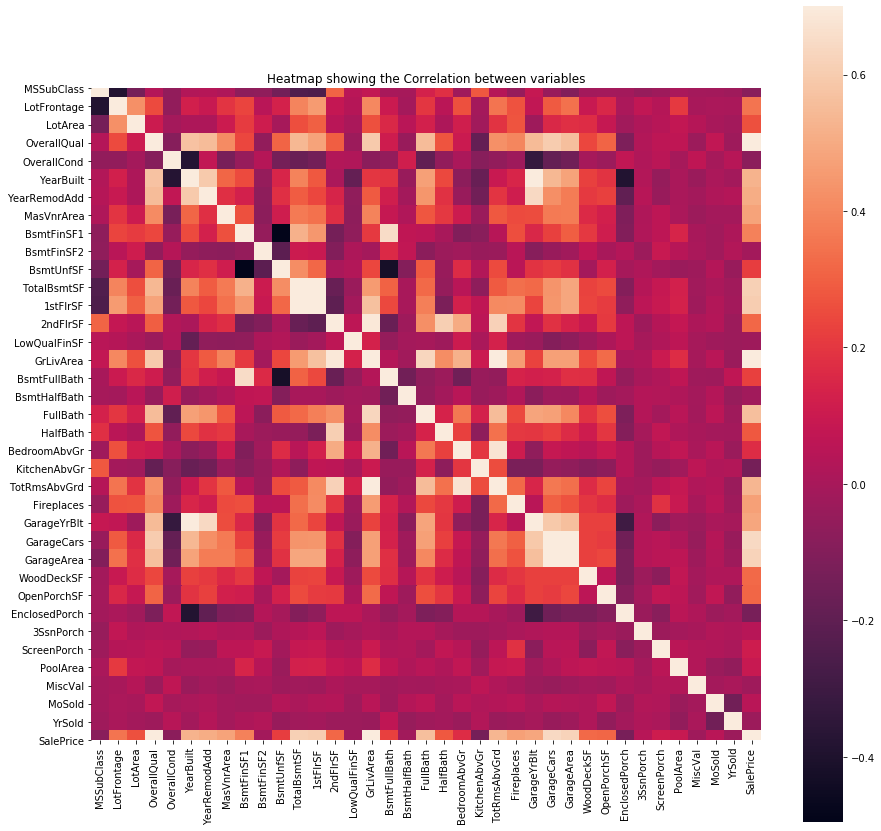

In [13]:
# =======================         Correlation Matrix Heatmap          ======================= 

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr, vmax=.7, square=True);
ax.set_title('Heatmap showing the Correlation between variables')

In [14]:
df_temp = df_corr['SalePrice']
df_df = pd.DataFrame(df_temp)
df_df.sort_values(["SalePrice"], axis=0, ascending=False, inplace=True) 
df_df 

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


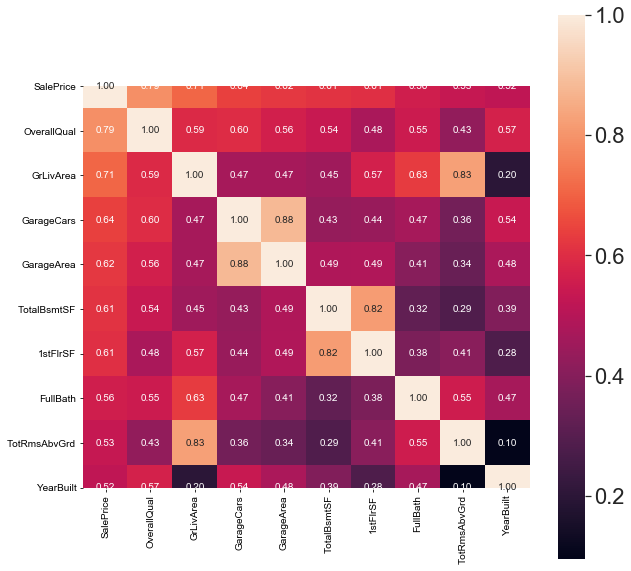

In [15]:
# Top 10 Heatmap
k = 10 #number of variables for heatmap
cols = df_df.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


In [17]:
val = df.values
count = 0
for i in range(len(val)):
    for j in range(len(val[i])):
        if not val[i][j]:
            count += 1
print("Null Values =",count)

Null Values = 17364


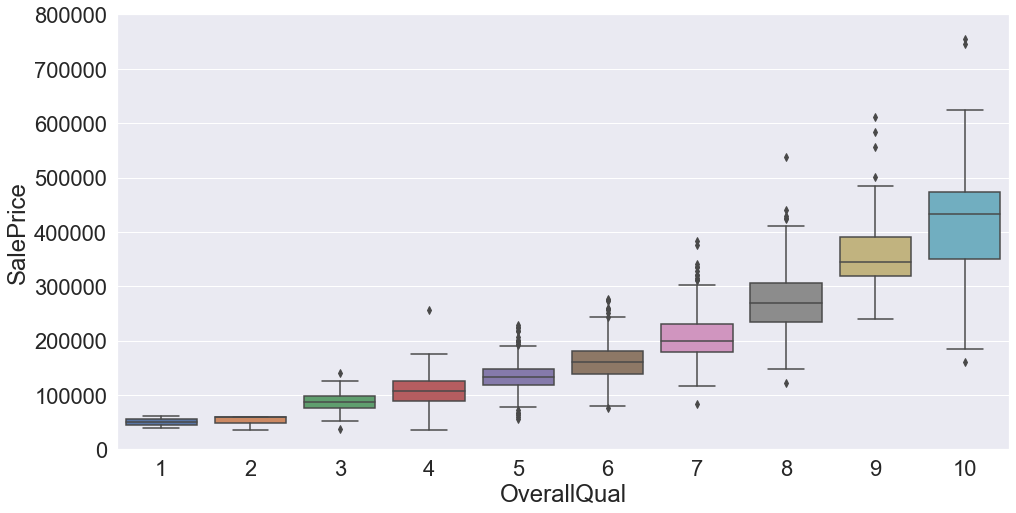

In [18]:
#  ========================================================================================================
#  =                                     Overall Quality vs Sale Price                                    =
#  ========================================================================================================
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
#df = df.drop(df[(df['SalePrice']>720000)].index).reset_index(drop=True)
               


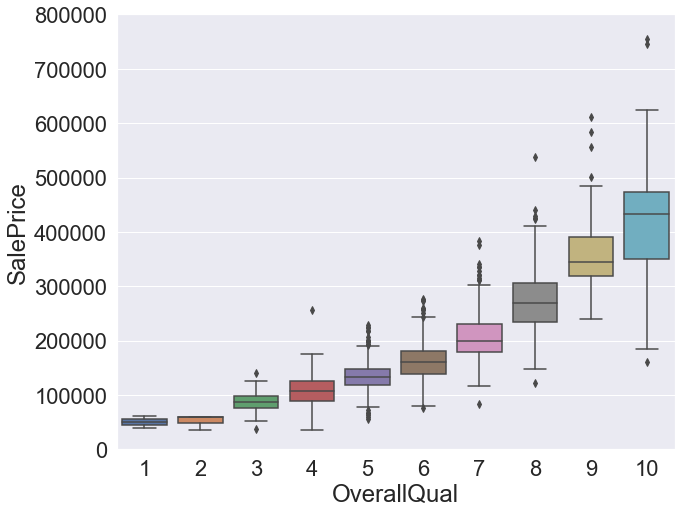

In [19]:
#  ========================================================================================================
#  =                                     Overall Quality vs Sale Price                                    =
#  ========================================================================================================
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10,8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

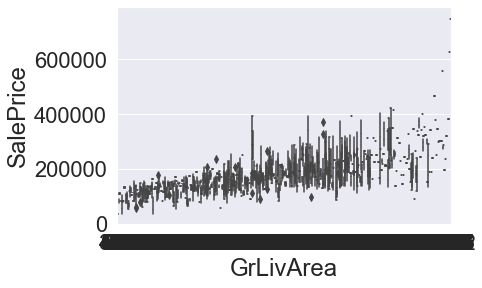

In [20]:
#  ========================================================================================================
#  =                                       Living Area vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GrLivArea'], y=df['SalePrice'])

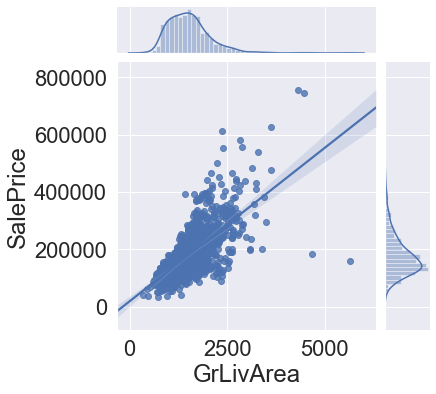

In [21]:
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')
#sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])

In [22]:
#  ========================================================================================================
#  =                                            Removing Outliers                                         =
#  ========================================================================================================

df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

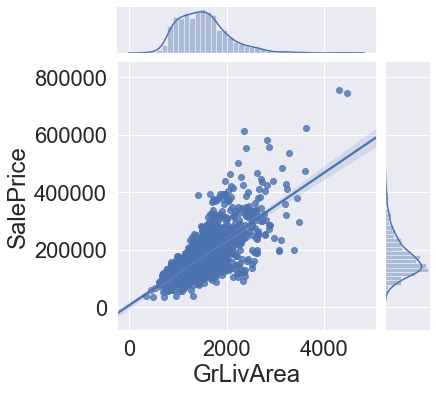

In [23]:
#  ========================================================================================================
#  =                       Living Area vs Sale Price after removing outliers                              =
#  ========================================================================================================
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'], kind='reg')

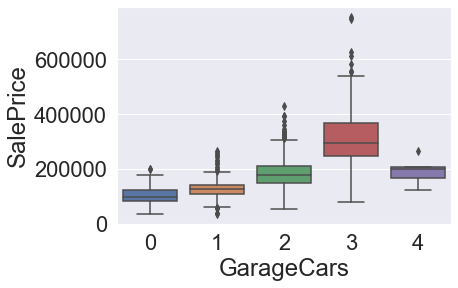

In [24]:
#  ========================================================================================================
#  =                                   Garage Capacity vs Sale Price                                      =
#  ========================================================================================================
sns.boxplot(x=df['GarageCars'], y=df['SalePrice'])

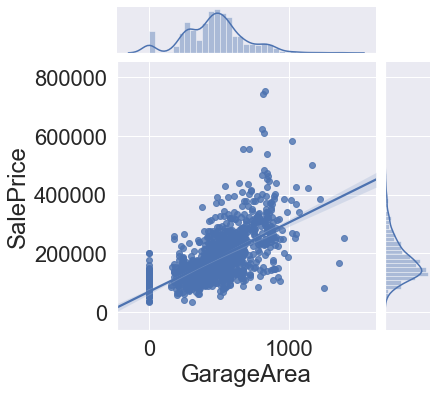

In [25]:
#  ========================================================================================================
#  =                                       Garage Area vs Sale Price                                      =
#  ========================================================================================================

sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

In [26]:
#  ========================================================================================================
#  =                                           Removing Outliers                                          =
#  ========================================================================================================

df = df.drop(df[(df['GarageArea']>1000) & (df['SalePrice']<300000)].index).reset_index(drop=True)

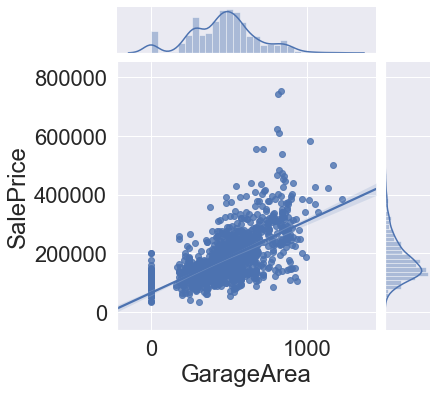

In [27]:
sns.jointplot(x=df['GarageArea'], y=df['SalePrice'], kind='reg')

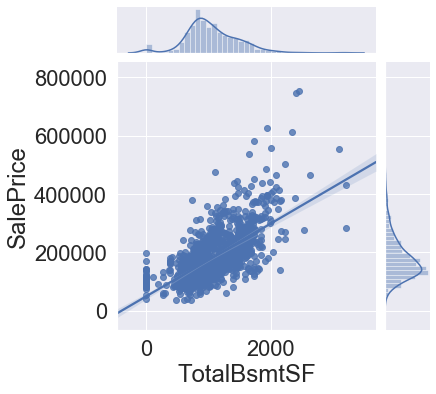

In [28]:
#  ========================================================================================================
#  =                                   Total Basement Area vs Sale Price                                  =
#  ========================================================================================================
sns.jointplot(x=df['TotalBsmtSF'], y=df['SalePrice'], kind='reg')

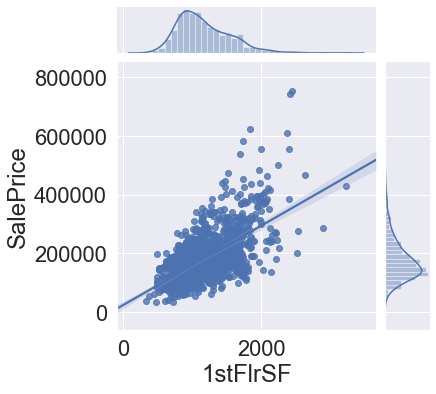

In [29]:
#  ========================================================================================================
#  =                                     First Floor Area vs Sale Price                                   =
#  ========================================================================================================
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice'], kind='reg')

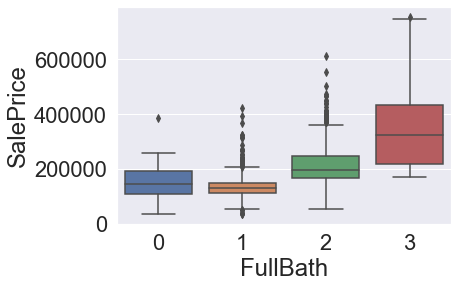

In [30]:
#  ========================================================================================================
#  =                                         Total Bath vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['FullBath'], y=df['SalePrice'])

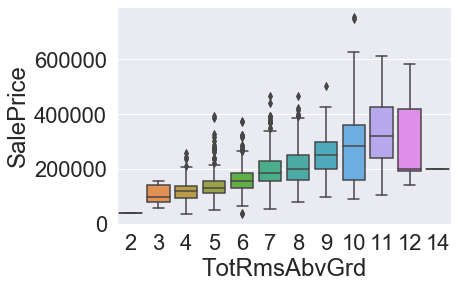

In [31]:
#  ========================================================================================================
#  =                                         Total Rooms vs Sale Price                                     =
#  ========================================================================================================
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice'])

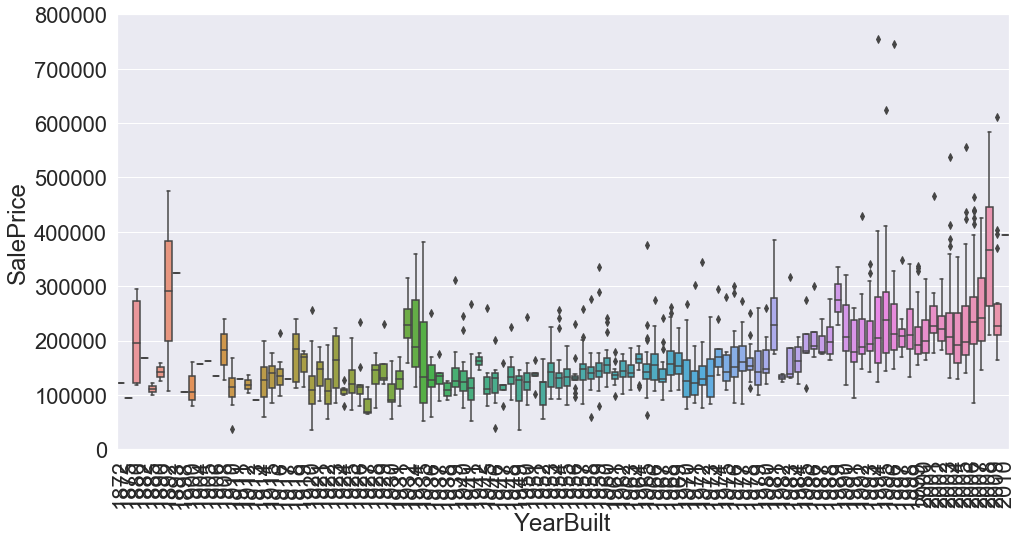

In [32]:
#  ========================================================================================================
#  =                                         Year Built vs Sale Price                                     =
#  ========================================================================================================
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [33]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    
    missing_data = df.isnull().sum()/len(df)*100
    missing_data = missing_data[missing_data>0]
    missing_data.columns = ['Attributes','Percent']
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df)
missing_data




PoolQC          99.586777
MiscFeature     96.349862
Alley           93.732782
Fence           80.647383
FireplaceQu     47.451791
LotFrontage     17.768595
GarageYrBlt      5.578512
GarageType       5.578512
GarageFinish     5.578512
GarageQual       5.578512
GarageCond       5.578512
BsmtFinType2     2.617080
BsmtExposure     2.617080
BsmtFinType1     2.548209
BsmtCond         2.548209
BsmtQual         2.548209
MasVnrArea       0.550964
MasVnrType       0.550964
Electrical       0.068871
dtype: float64

In [34]:
#sns.barplot(x = 'Attributes', y = 'Percent', data = missing_data, palette = 'viridis')

In [35]:
missing_data = missing_data.to_frame()
missing_data.columns = ['Percent']
missing_data.index.names = ['Name']
missing_data['Name'] = missing_data.index

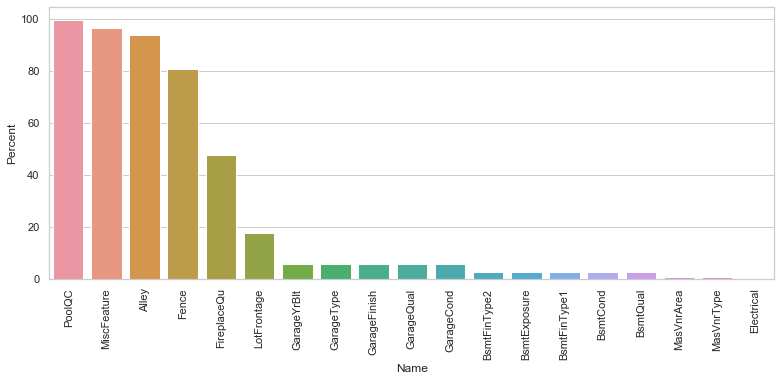

In [36]:
#plot Missing values
plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='Percent', data=missing_data)
plt.xticks(rotation = 90)
plt.show()

In [38]:
df['PoolQC'].fillna('No Pool', inplace = True)
df['MiscFeature'].fillna('None', inplace = True)
df['Alley'].fillna('No alley access', inplace = True)
df['Fence'].fillna('No Fence', inplace = True)
df['FireplaceQu'].fillna('No Fireplace', inplace = True)
df['GarageType'].fillna('No Garage', inplace = True)
df['GarageCond'].fillna('No Garage', inplace = True)
df['GarageFinish'].fillna('No Garage', inplace = True)
df['GarageQual'].fillna('No Garage', inplace = True)
df['BsmtFinType2'].fillna('No Basement', inplace = True)
df['BsmtExposure'].fillna('No Basement', inplace = True)
df['BsmtQual'].fillna('No Basement', inplace = True)
df['BsmtCond'].fillna('No Basement', inplace = True)
df['BsmtFinType1'].fillna('No Basement', inplace = True)
df['MasVnrType'].fillna('None', inplace = True)
df['Electrical'].fillna(value = 'SBrkr', inplace = True)  # Filling the NaN values with mode 'SBrkr'
df['MasVnrArea'].fillna(0, inplace = True) # Filling the missing values with 0 as they do not have Mason Veneer
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace = True)
df['LotFrontage'].fillna(0, inplace = True)

In [39]:
# Find Missing Ratio of Dataset
def findMissingData(df):
    df_na = (df.isnull().sum() / len(df)) * 100
    df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :df_na})
    return(missing_data)

missing_data = findMissingData(df)
missing_data

,Missing Ratio


In [ ]:
#  ========================================================================================================
#  =                                         FIXING SKEWNESS IN DATA                                      =
#  ========================================================================================================

In [40]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,RL,62.0,7917,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,8,2007,WD,Normal,175000
1448,20,RL,85.0,13175,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,MnPrv,None,0,2,2010,WD,Normal,210000
1449,70,RL,66.0,9042,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1450,20,RL,68.0,9717,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,4,2010,WD,Normal,142125



 mu = 12.02 and sigma = 0.40



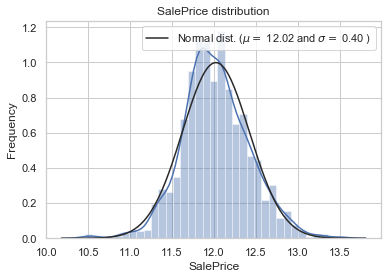

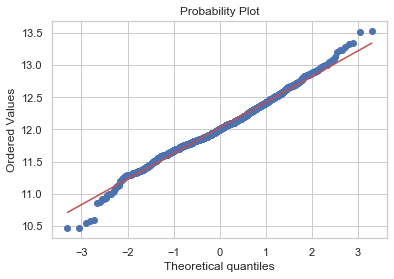

Skewness: 0.121347
Kurtosis: 0.809519


In [41]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_t["SalePrice"] = np.log1p(df_t["SalePrice"])

#Check the new distribution 
sns.distplot(df_t['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_t['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(df_t['SalePrice'], plot=plt)
plt.show()

y_train = df_t.SalePrice.values

print("Skewness: %f" % df_t['SalePrice'].skew())
print("Kurtosis: %f" % df_t['SalePrice'].kurt())

In [42]:
#  ========================================================================================================
#  =                                              LINEAR ENCODING                                         =
#  ========================================================================================================


In [43]:
categorialCols = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

In [44]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        print("Values After Transformation ",df[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)


Values before Transformation  ['RL' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['No alley access' 'No alley access' 'No alley access' ...
 'No alley access' 'No alley access' 'No alley access']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['Reg' 'Reg' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 3 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'FR2' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 2 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl' 'G

In [45]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [46]:
df_t.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [47]:
#Take targate variable into y
y = df['SalePrice']

In [48]:
#Delete the saleprice
del df['SalePrice']

In [49]:
#Take their values in X and y
X = df.values
y = y.values

In [50]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=7)

In [51]:
X_test.shape

(1162, 79)

In [69]:
#  ========================================================================================================
#  =                                       Writng the differences to a file                               =
#  ========================================================================================================
def fileWriter(regressor,model,X_test):
    print("Actual Value","\t","Predicted Value","\t","Accuracy (%)")
    header = "Actual Value" + "," + "Predicted Value" + "," +  "Accuracy (%)"
    name = 'FinalPrediction_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        diffPercent = 100 - (abs((float(y_test[i]) - float(temp)) * 100) / float(y_test[i]))
        predicted_value = (str(y_test[i]) + "," + temp + "," + str(diffPercent))
        print(str(y_test[i]) + "\t" + "\t" + temp + "\t" + "\t" + str(diffPercent))
        f.write(predicted_value + '\n')
    f.close()


In [70]:
def sorterFunction(regressor):
    name = 'FinalPrediction_'+ regressor + '.csv'
    print(name)
    data = csv.reader(open(name),delimiter=',')
    sortedlist = sorted(reader, key=lambda row: row[3], reverse=True)

In [71]:
#  ========================================================================================================
#  =                                              Regression                                              =
#  ========================================================================================================

In [72]:
#  ==================================       LINEAR REGRESSION      ============================================
model_linear = linear_model.LinearRegression()


#  ==================================      RANDOM FOREST           ============================================
model_randomForest = RandomForestRegressor(n_estimators=1000)

#  ==================================      ELASTIC NET             ============================================
model_eNET = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)


In [73]:
#  ========================================================================================================
#  =                                        FITTING THE MODEL                                             =
#  ========================================================================================================

In [74]:
model_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
model_randomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [76]:
model_eNET.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37712730209.04584, tolerance: 225782549.05836174
  positive)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
#  ========================================================================================================
#  =                                     PREDICTING THE VALUE                                             =
#  ========================================================================================================

In [78]:
print("=================================       LINEAR REGRESSION      ============================================")
temp = str(model_linear.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))
      
print("=================================      FOREST FOREST           ============================================")
temp = str(model_randomForest.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))


print("=================================      ELASTIC NET             ============================================")
temp = str(model_eNET.predict([X_test[100]]))
temp = temp.replace("[","") 
temp = temp.replace("]","") 
print("Predict value " + temp)
print("Real value " + str(y_test[100]))

=================================       LINEAR REGRESSION      ============================================
Predict value 118263.28022014
Real value 125500
=================================      FOREST FOREST           ============================================
Predict value 116132.702
Real value 125500
=================================      ELASTIC NET             ============================================
Predict value 118298.88307376
Real value 125500


In [79]:
#  ========================================================================================================
#  =                                           MODEL ACCURACY                                            =
#  ========================================================================================================

In [80]:
print("=================================      LINEAR REGRESSION       ============================================")
print("Score --> ", model_linear.score(X, y)*100)
      
print("=================================      RANDOM FOREST           ============================================")
print("Score --> ", model_randomForest.score(X_test, y_test)*100)


print("=================================      ELASTIC NET             ============================================")
print("Score --> ", model_eNET.score(X_test, y_test)*100)


=================================      LINEAR REGRESSION       ============================================
Score -->  83.6387811213758
=================================      RANDOM FOREST           ============================================
Score -->  87.81570015162475
=================================      ELASTIC NET             ============================================
Score -->  80.29065726195446


In [81]:
#  ========================================================================================================
#  =                  Writng the differences to a file for Linear Regression                              =
#  ========================================================================================================

fileWriter("LinearRegression",model_linear,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175098.30663285		98.78710599257225
150900		175034.79865667		84.0060976430285
173500		168667.11538506		97.21447572625937
246578		228774.05708578		92.77958986032006
227680		246689.81421949		91.65064378975316
214000		190194.77643006		88.87606375236449
154000		219071.48735718		57.745787430402586
95000		69577.35076838		73.23931659829474
64500		64600.71089288		99.8438590808062
171000		162248.95436429		94.88242945280116
153900		107080.26861055		69.57782235903184
185000		171170.22243362		92.52444455871351
318061		301505.43821243		94.7948469672264
122000		119919.54024608		98.2947051197377
159000		214554.30559338		65.06018516139622
167900		190273.24241792		86.67466205007743
139000		139031.85443539		99.9770831400072
160000		90704.17445956		56.690109037225
277000		333584.84891692		79.57225670869313
145500		135096.54955087		92.84986223427491
173000		167594.30717614		96.87532206713294
145000		159647.57773807		89.8982222496069
239000		225143.00729

180000		195632.01234633		91.31554869648333
92000		103627.12710728		87.36181836165217
174000		172076.90653156		98.89477386871265
234000		202664.50997331		86.60876494585897
120000		101470.56580954		84.55880484128333
174000		198083.76833001		86.15875383332758
117000		131057.35670756		87.98516520721367
269500		225696.99008492		83.74656403893135
177000		183522.38746887		96.31503532832204
301500		336763.94850117		88.30383134289553
115000		99195.72739398		86.25715425563479
162500		165979.01831612		97.85906565161847
225000		237376.9985274		94.4991117656
194000		184994.93917606		95.35821607013402
93500		44766.59926798		47.87871579463101
271000		275499.55867012		98.33964624718818
169500		170969.71628443		99.13291074664896
179665		200615.68093236		88.33903045536971
164990		189058.16211547		85.41235098159282
124900		155283.4111641		75.67381011681346
402861		366532.00554531		90.98225083721432
200141		193183.07654514		96.52348921267507
173000		217575.73501567		74.23367918169363
145000		144356.951446

130000		197545.77706546		48.04170994964616
89500		123993.38725924		61.459902503642454
195000		216654.42226113		88.89516807121538
138500		131455.67501957		94.91384477947291
155000		151770.87629818		97.91669438592258
142600		116451.37984105		81.66295921532259
139000		100442.49551821		72.26078814259712
179900		166587.14697356		92.59985935161757
149000		167002.15773644		87.91801494198658
134000		134473.42644774		99.64669668079105
171000		173318.78879646		98.64398315996492
100000		134937.84202791		65.06215797209
190000		210523.717174		89.19804359263159
378500		328166.1533453		86.70175781910172
180000		132064.96496676		73.36942498153333
130000		124155.23138724		95.50402414403077
137450		139715.92451422		98.35145542799563
146000		178906.19718737		77.46150877577396
202500		217778.03259461		92.4552925458716
265979		223391.36249895		83.98834588405475
86000		84029.37671629		97.7085775770814
175500		185909.52030984		94.06864939610256
193000		194082.33290866		99.43920574680828
201000		219003.835218

In [82]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Random Forest                              =
#  ========================================================================================================

fileWriter("RandomForest",model_randomForest,X_test)

Actual Value 	 Predicted Value 	 Accuracy (%)
173000		190363.931		89.96304566473988
150900		168292.796		88.47395891318754
173500		170581.908		98.31810259365994
246578		220578.202		89.45575112134902
227680		214615.261		94.26179769852425
214000		215191.413		99.44326495327103
154000		183192.003		81.0441538961039
95000		145942.241		46.376588421052624
64500		105879.35		35.84596899224806
171000		159060.212		93.01766783625732
153900		150995.606		98.11280441845354
185000		167289.045		90.42651081081081
318061		308273.495		96.92275852745227
122000		216767.893		22.32139918032786
159000		173894.63		90.63230817610062
167900		165574.601		98.61500952948182
139000		136958.122		98.53102302158274
160000		135349.455		84.593409375
277000		224232.61		80.95040072202166
145500		139292.303		95.73354158075603
173000		163212.686		94.3425930635838
145000		161967.59		88.29821379310346
239000		265062.688		89.09510962343096
134432		153898.827		85.51920152939778
175000		154392.558		88.22431885714285
180000		160592.1

136500		135019.389		98.9153032967033
160000		150530.676		94.08167250000001
143000		153933.762		92.3540125874126
119000		142114.621		80.57594873949579
208900		183694.027		87.93395260890378
201000		226937.28		87.09588059701493
87000		103959.652		80.50614712643679
274300		247494.911		90.22782026977761
169000		180925.089		92.94373431952663
290000		275419.131		94.97211413793103
271000		272187.187		99.56192361623617
466500		399463.232		85.62984608788854
124500		136131.336		90.65756144578313
98000		117877.625		79.71670918367347
250000		280360.361		87.85585560000001
128500		136401.925		93.85064202334631
158000		162091.368		97.4105265822785
140000		142237.516		98.40177428571428
218000		172540.505		79.14702064220184
91300		100443.751		89.9849386637459
143500		138806.009		96.72892613240417
189000		209679.473		89.0584798941799
286000		260856.299		91.20849615384616
145250		148267.589		97.9224860585198
167900		164402.291		97.91679035139964
127000		136464.798		92.5474031496063
141000		130605.804		92.

225000		249866.719		88.94812488888888
194000		213476.24		89.96070103092784
93500		98430.569		94.72666417112299
271000		253771.874		93.64275793357933
169500		153184.304		90.37422064896755
179665		171434.628		95.41904544569059
164990		196342.873		80.99710709739985
124900		145515.099		83.49471657325861
402861		381128.902		94.6055592375534
200141		205576.363		97.28423311565346
173000		181891.648		94.86031907514452
145000		118843.958		81.9613503448276
386250		383014.699		99.16238161812298
122000		114145.558		93.56193278688525
80500		91292.481		86.59319130434783
134000		151606.608		86.86074029850745
178000		176428.555		99.11716573033708
281000		275226.215		97.9452722419929
167000		149151.407		89.31221976047905
133000		130487.145		98.11063533834587
140000		148915.867		93.63152357142857
109900		111144.863		98.86727661510464
110000		112995.975		97.27638636363636
133000		152664.37		85.21475939849624
134800		130409.797		96.7431728486647
126000		130994.617		96.03601825396825
156000		140103.751		89

93000		106439.615		85.54880107526881
108500		104954.606		96.73235576036866
207500		173875.788		83.79556048192771
137000		157642.949		84.93215401459854
165000		152339.893		92.32720787878789
107500		150262.798		60.22065302325581
127000		130105.82		97.55447244094488
104000		167421.575		39.01771634615384
222500		235758.902		94.04094292134832
248900		268182.237		92.2530184813178
115000		145041.194		73.87722260869566
236000		242110.629		97.41075042372881
147000		134067.11		91.20211564625849
254900		236020.028		92.59318477834445
260000		265153.164		98.01801384615385
207500		189075.756		91.12084626506024
200000		234381.89		82.809055
129900		121061.552		93.19595996920708
81000		109784.863		64.46313209876544
172500		163616.51		94.85015072463769
179540		186867.759		95.91859251420297
188500		177354.261		94.08714111405835
280000		240339.728		85.83561714285715
158500		142817.649		90.10577223974764
256000		191200.132		74.6875515625
210000		167146.753		79.5936919047619
129000		216029.092		32.535587596

87000		102394.378		82.30531264367816
185000		178401.683		96.43334216216216
105000		125998.179		80.00173428571428
200000		205453.894		97.273053
125000		131366.651		94.90667919999999
80000		94207.898		82.2401275
187100		205431.824		90.2021250668092
348000		311933.771		89.63614109195403
100000		115933.58		84.06642
110000		138602.855		73.99740454545454
163990		172373.391		94.88786450393316
105000		122755.054		83.09042476190476
117500		173104.63		52.67691063829787
194500		188176.105		96.74864010282776
266000		293912.196		89.50669323308271
224000		204122.256		91.12600714285713
223500		210550.501		94.20604071588366
192500		201963.105		95.0841012987013
143000		156276.458		90.71576363636363
282922		249480.543		88.17997292539994
135750		112878.789		83.15196243093922
283463		277895.859		98.03602551302991
143750		137936.122		95.95556313043478
285000		312118.873		90.48460596491228
123000		123599.711		99.51243008130082
177000		167246.23		94.489395480226
556581		387967.847		69.70554995589141
181900		

174000		207886.703		80.52488333333332
67000		82812.95		76.39858208955224
140000		137071.224		97.90801714285713
213000		187766.549		88.15330938967136
239000		286056.871		80.31093263598328
114504		129682.342		86.74426919583595
140200		146950.83		95.18485734664766
144000		190461.044		67.73538611111111
167000		166501.005		99.7012005988024
159000		161669.25		98.32122641509434
501837		438555.399		87.39000890727466
137500		143340.632		95.75226763636363
82000		95877.989		83.0756231707317
157000		147913.39		94.21235031847135
184100		173008.995		93.97555404671374
127500		119897.797		94.03748784313726
124900		119726.147		95.85760368294635
129000		127357.998		98.72713023255814
143000		129544.877		90.59082307692307
128000		149462.145		83.23269921875001
275000		267897.548		97.41729018181819
235000		238932.389		98.32664297872341
135000		131642.908		97.51326518518518
155000		138642.945		89.44706129032258
139000		135624.213		97.5713762589928
79900		127669.208		40.21375719649562
203000		209745.767		96.6

In [83]:
#  ========================================================================================================
#  =                      Writng the differences to a file for Elastic NET                                =
#  ========================================================================================================

fileWriter("ElasticNetRegression",model_eNET,X_test)


Actual Value 	 Predicted Value 	 Accuracy (%)
173000		175260.79277122		98.69318336923699
150900		175289.79206154		83.83711593005964
173500		168611.04032834		97.1821558088415
246578		228738.05467805		92.76498904121615
227680		246755.45616035		91.62181300054901
214000		190188.60247921		88.87317872860281
154000		219129.32251282		57.70823213453246
95000		69886.79723792		73.56504972412631
64500		64914.59637478		99.35721492282171
171000		162210.85147078		94.86014705893568
153900		107104.33364538		69.59345915879142
185000		170314.43340273		92.06185589336758
318061		301473.57304448		94.78482839596178
122000		119499.09104727		97.95007462890985
159000		214524.97425002		65.07863254715724
167900		190154.98481247		86.74509540650982
139000		138994.25960628		99.99587022034531
160000		90851.67564478		56.782297277987496
277000		333095.82342721		79.7488002067834
145500		135099.26888562		92.85173119286598
173000		167569.73730398		96.86111982889017
145000		159459.9820559		90.02759858213793
239000		225075.

181000		182841.07119898		98.98283359172376
153500		151600.86309519		98.7627772607101
135000		162332.37488346		79.75379638262223
109500		112110.65807636		97.6158373731872
124500		153487.47531079		76.71688730057028
86000		67503.79739198		78.49278766509302
403000		335042.91723802		83.13720030720098
222500		220002.98126578		98.8777443891146
240000		282639.47091306		82.233553786225
325624		369270.5672934		86.59602262320959
144000		125849.81710485		87.3957063228125
185000		176266.74516459		95.27932171058919
244000		397826.65093297		36.956290601241804
582933		409442.02105519		70.23826426968279
325000		334942.17892264		96.94086802380308
215000		221619.96774086		96.9209452368093
226000		226832.66287671		99.63156509880088
183500		196853.50181519		92.7228872941744
34900		86752.45725112		-48.57437607770771
73000		131806.45214857		19.443216234835603
112000		100465.38743305		89.70123877950893
108959		141552.9037531		70.0860839828743
176000		178824.17226707		98.3953566664375
139000		165667.53178437		

129000		171653.80517403		66.93503474881395
112500		103199.4252788		91.73282247004445
235000		218005.07665264		92.76811772452767
149500		179453.97907552		79.96389359496989
175000		189947.80865672		91.45839505330285
91500		112738.04571046		76.78902108146447
320000		310085.00171662		96.90156303644375
136905		125310.37464486		91.53089707816369
198500		176671.67125601		89.00336083426197
139000		136634.27575283		98.29804010994964
112000		134873.96374535		79.57681808450894
127000		146779.6004016		84.42551149480315
148500		115470.09149205		77.75763736838384
383970		385363.02085152		99.6372058099539
100000		98552.40665209		98.55240665209
82500		86443.16237488		95.22040924256969
225000		259359.04828176		84.72931187477333
139000		157306.74436528		86.8296803127482
142000		154699.07809408		91.05698725769014
155900		139205.68656155		89.29165270144324
135500		141082.2520784		95.88025676870849
155000		152237.250823		98.21758117612904
176500		193854.99007262		90.16714443477619
151000		166171.08239576		

163990		178330.14761509		91.25547434899079
105000		126614.11599112		79.41512762750477
117500		171435.84976389		54.09714913711489
194500		212906.43784719		90.53653581121335
266000		289591.55251708		91.13099529433083
224000		235107.77309856		95.04117272385714
223500		208744.5854016		93.39802478818791
192500		194951.84471311		98.72631443474805
143000		167146.69104127		83.11420206904195
282922		249636.90747476		88.23524062277235
135750		116997.11245584		86.18571819951381
283463		289574.9817059		97.84381675707236
143750		150951.13216472		94.99051675497739
285000		343010.44865965		79.64545661064912
123000		129449.05847538		94.75686302814634
177000		192799.19483587		91.07390122267232
556581		412691.28347066		74.14756944104451
181900		155787.87424469		85.64479067877406
194000		233017.51697463		79.88787784812885
178000		183804.30167471		96.73915636252246
192000		186315.08764303		97.03910814741147
294000		259675.58408611		88.32502860071769
230000		175429.44318812		76.27367095135652
167500		23764

208500		211546.41538201		98.53888950503118
258000		285590.50095191		89.30600738298062
168500		149630.56518873		88.80152236719881
220000		236024.77330478		92.7160121341909
259500		265933.05319871		97.52098142631598
140000		162354.13070749		84.03276378036429
224900		218195.60951625		97.01894598321476
165000		178053.0789846		92.08904303963637
168500		106739.502323		63.34688565163204
124000		137252.16151474		89.31277297198388
144500		147736.11979827		97.76047072784084
231500		214608.31973766		92.70337785644061
135000		223471.55661463		34.465513618792585
166000		203814.64928597		77.22009079158434
216500		224021.05234242		96.52607282105312
174000		193124.28747671		89.00903018579886
67000		69519.60631227		96.23939356377612
140000		142760.87907881		98.02794351513572
213000		191800.59243402		90.04722649484508
239000		276941.677026		84.12482132803348
114504		143498.1820047		74.67845489703416
140200		152222.76851755		91.42455883199003
144000		153700.07463844		93.26383705663888
167000		253663.6946

In [84]:
df.to_csv("dft.csv")

In [ ]:
#  ========================================================================================================
#  =                                           Using the Test Data                                        =
#  ========================================================================================================

In [85]:
df_test = pd.read_csv("test_or.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [86]:
df_test = df_test.drop(['Id'], axis=1)
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [87]:
# Find Missing Ratio of Dataset
def findMissingData(df_test):
    missing_data = df_test.isnull().sum()/len(df_test)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df_test)
missing_data

PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageYrBlt      5.346127
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
MasVnrType       1.096642
MasVnrArea       1.028101
MSZoning         0.274160
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
Utilities        0.137080
Functional       0.137080
Exterior2nd      0.068540
Exterior1st      0.068540
SaleType         0.068540
BsmtFinSF1       0.068540
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
KitchenQual      0.068540
GarageCars       0.068540
GarageArea       0.068540
TotalBsmtSF      0.068540
dtype: float64

In [88]:
df_test['PoolQC'].fillna('No Pool', inplace = True)
df_test['MiscFeature'].fillna('None', inplace = True)
df_test['Alley'].fillna('No alley access', inplace = True)
df_test['Fence'].fillna('No Fence', inplace = True)
df_test['FireplaceQu'].fillna('No Fireplace', inplace = True)
df_test['GarageType'].fillna('No Garage', inplace = True)
df_test['GarageCond'].fillna('No Garage', inplace = True)
df_test['GarageFinish'].fillna('No Garage', inplace = True)
df_test['GarageQual'].fillna('No Garage', inplace = True)
df_test['BsmtFinType2'].fillna('No Basement', inplace = True)
df_test['BsmtExposure'].fillna('No Basement', inplace = True)
df_test['BsmtQual'].fillna('No Basement', inplace = True)
df_test['BsmtCond'].fillna('No Basement', inplace = True)
df_test['BsmtFinType1'].fillna('No Basement', inplace = True)
df_test['MasVnrType'].fillna('None', inplace = True)
df_test['Electrical'].fillna(value = 'SBrkr', inplace = True)  # Filling the NaN values with mode 'SBrkr'
df_test['MasVnrArea'].fillna(0, inplace = True) # Filling the missing values with 0 as they do not have Mason Veneer
df_test['GarageYrBlt'].fillna(df_test['YearBuilt'], inplace = True)
df_test['LotFrontage'].fillna(0, inplace = True)
df_test['MSZoning'].fillna('No MSZoning', inplace = True)
df_test['Functional'].fillna('No Functional', inplace = True)
df_test['BsmtHalfBath'].fillna(0, inplace = True)
df_test['BsmtFullBath'].fillna(0, inplace = True)
df_test['Utilities'].fillna('Utilities', inplace = True)
df_test['SaleType'].fillna('No SaleType', inplace = True)
df_test['GarageArea'].fillna(0, inplace = True)
df_test['GarageCars'].fillna(0, inplace = True)
df_test['KitchenQual'].fillna(0, inplace = True)
df_test['TotalBsmtSF'].fillna(0, inplace = True)
df_test['BsmtUnfSF'].fillna(0, inplace = True)
df_test['BsmtFinSF1'].fillna(0, inplace = True)
df_test['BsmtFinSF2'].fillna(0, inplace = True)
df_test['Exterior1st'].fillna('No Exterior1st', inplace = True)
df_test['Exterior2nd'].fillna('No Exterior2nd', inplace = True)
df_test['KitchenQual'].fillna('No KitchenQual', inplace = True)
df_test['TotalBsmtSF'].fillna(0, inplace = True)


In [89]:
# Find Missing Ratio of Dataset
def findMissingData(df_test):
    missing_data = df_test.isnull().sum()/len(df_test)*100
    missing_data = missing_data[missing_data>0]
    missing_data.sort_values(inplace=True, ascending=False)
    return(missing_data)

missing_data = findMissingData(df_test)
missing_data

Series([], dtype: float64)

In [90]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,120,0,No Pool,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,Inside,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal


In [91]:
def linearEncoder(categorialCols):
    for c in categorialCols:
        print("Values before Transformation ",df_test[c].values)
        lbl = LabelEncoder() 
        lbl.fit(list(df_test[c].values)) 
        df_test[c] = lbl.transform(list(df_test[c].values))
        print("Values After Transformation ",df_test[c].values)
        print("=================================================")
    

linearEncoder(categorialCols)

Values before Transformation  ['RH' 'RL' 'RL' ... 'RL' 'RL' 'RL']
Values After Transformation  [3 4 4 ... 4 4 4]
Values before Transformation  ['Pave' 'Pave' 'Pave' ... 'Pave' 'Pave' 'Pave']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['No alley access' 'No alley access' 'No alley access' ...
 'No alley access' 'No alley access' 'No alley access']
Values After Transformation  [1 1 1 ... 1 1 1]
Values before Transformation  ['Reg' 'IR1' 'IR1' ... 'Reg' 'Reg' 'Reg']
Values After Transformation  [3 0 0 ... 3 3 3]
Values before Transformation  ['Lvl' 'Lvl' 'Lvl' ... 'Lvl' 'Lvl' 'Lvl']
Values After Transformation  [3 3 3 ... 3 3 3]
Values before Transformation  ['AllPub' 'AllPub' 'AllPub' ... 'AllPub' 'AllPub' 'AllPub']
Values After Transformation  [0 0 0 ... 0 0 0]
Values before Transformation  ['Inside' 'Corner' 'Inside' ... 'Inside' 'Inside' 'Inside']
Values After Transformation  [4 0 4 ... 4 4 4]
Values before Transformation  ['Gtl' 'Gtl' 'Gtl' ... 'Gtl'

In [92]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74.0,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78.0,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43.0,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,5,21.0,1936,1,1,3,3,0,4,...,0,0,2,4,1,0,6,2006,9,4
1455,160,5,21.0,1894,1,1,3,3,0,4,...,0,0,2,4,1,0,4,2006,9,0
1456,20,4,160.0,20000,1,1,3,3,0,4,...,0,0,2,4,1,0,9,2006,9,0
1457,85,4,62.0,10441,1,1,3,3,0,4,...,0,0,2,2,3,700,7,2006,9,4


In [93]:
TEST_DATA = df_test.values

In [94]:
TEST_DATA

array([[  20.,    3.,   80., ..., 2010.,    9.,    4.],
       [  20.,    4.,   81., ..., 2010.,    9.,    4.],
       [  60.,    4.,   74., ..., 2010.,    9.,    4.],
       ...,
       [  20.,    4.,  160., ..., 2006.,    9.,    0.],
       [  85.,    4.,   62., ..., 2006.,    9.,    4.],
       [  60.,    4.,   74., ..., 2006.,    9.,    4.]])

In [95]:
TEST_DATA.shape

(1459, 79)

In [96]:
def testFileWriter(regressor,model,X_test):
    print("Predicted Value")
    header = "Predicted Value"
    name = 'SalePrice_'+ regressor + '.csv'
    f = open(name,'w')
    f.write(header + '\n')
    for i in range(len(X_test)):
        temp = str(model.predict([X_test[i]]))
        temp = temp.replace("[","") 
        temp = temp.replace("]","") 
        predicted_value = str(temp)
        print(i,X_test[i],temp)
        f.write(predicted_value + '\n')
        #f.write(temp + '\n')
    f.close()

In [98]:
testFileWriter("PredictedValues",model_randomForest,TEST_DATA)

Predicted Value
0 [2.0000e+01 3.0000e+00 8.0000e+01 1.1622e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.2000e+01
 1.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 6.0000e+00
 1.9610e+03 1.9610e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 5.0000e+00 4.6800e+02 3.0000e+00 1.4400e+02
 2.7000e+02 8.8200e+02 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 8.9600e+02 0.0000e+00 0.0000e+00 8.9600e+02 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00 5.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9610e+03 3.0000e+00
 1.0000e+00 7.3000e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.4000e+02
 0.0000e+00 0.0000e+00 0.0000e+00 1.2000e+02 0.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 126399.785
1 [2.0000e+01 4.0000e+00 8.1000e+01 1.4267e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000

11 [1.600e+02 5.000e+00 2.100e+01 1.680e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+00 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 6.000e+00 5.000e+00 1.971e+03 1.971e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 1.000e+00 5.040e+02 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 1.560e+02 6.000e+00
 0.000e+00 3.270e+02 4.830e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 4.830e+02 5.040e+02 0.000e+00 9.870e+02 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.971e+03 3.000e+00 1.000e+00 2.640e+02 4.000e+00
 5.000e+00 2.000e+00 2.750e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 2.010e+03
 0.000e+00 4.000e+00] 97739.081
12 [1.600e+02 5.000e+00 2.100e+01 1.680e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+00 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 5.000e+00 5.000e+0

23 [1.200e+02 4.000e+00 4.300e+01 3.203e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 7.000e+00 5.000e+00 2.006e+03 2.006e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 1.400e+01 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 0.000e+00 2.000e+00 1.600e+01 6.000e+00
 0.000e+00 1.129e+03 1.145e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.145e+03 0.000e+00 0.000e+00 1.145e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.006e+03 0.000e+00 2.000e+00 4.370e+02 4.000e+00
 5.000e+00 2.000e+00 1.000e+02 1.160e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+00 2.010e+03
 9.000e+00 4.000e+00] 189922.61
24 [8.000e+01 4.000e+00 6.700e+01 1.330e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 7.000e+00 5.000e+0

35 [1.200e+02 1.000e+00 2.500e+01 4.835e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 7.000e+00 5.000e+00 2.004e+03 2.005e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+00 1.298e+03 6.000e+00
 0.000e+00 1.900e+02 1.488e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.488e+03 0.000e+00 0.000e+00 1.488e+03 1.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.004e+03 0.000e+00 2.000e+00 5.060e+02 4.000e+00
 5.000e+00 2.000e+00 1.680e+02 5.000e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.010e+03
 9.000e+00 4.000e+00] 227512.929
36 [1.600e+02 1.000e+00 3.900e+01 3.515e+03 1.000e+00 2.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 4.000e+00 4.000e+00 7.000e+00 5.000e+

45 [2.0000e+01 4.0000e+00 0.0000e+00 1.0456e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.4000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 6.0000e+00 6.0000e+00
 1.9670e+03 1.9670e+03 3.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 1.0000e+00 1.2000e+02 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 5.0600e+02 6.0000e+00 0.0000e+00
 1.3230e+03 1.8290e+03 0.0000e+00 2.0000e+00 1.0000e+00 3.0000e+00
 1.8290e+03 0.0000e+00 0.0000e+00 1.8290e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00 8.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9670e+03 2.0000e+00
 2.0000e+00 5.3500e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 7.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 171541.295
46 [6.0000e+01 4.0000e+00 8.0000e+01 1.0791e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+0

57 [9.000e+01 4.000e+00 7.000e+01 8.267e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.200e+01 1.000e+00 2.000e+00
 2.000e+00 2.000e+00 5.000e+00 5.000e+00 1.958e+03 1.958e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.604e+03 1.604e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.604e+03 0.000e+00 0.000e+00 1.604e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 4.000e+00 2.000e+00 4.000e+00 8.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.958e+03 3.000e+00 2.000e+00 5.760e+02 4.000e+00
 5.000e+00 2.000e+00 4.200e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.010e+03
 9.000e+00 4.000e+00] 132043.733
58 [2.000e+01 4.000e+00 7.000e+01 8.197e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+

69 [2.000e+01 4.000e+00 8.000e+01 9.760e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 1.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 7.000e+00 1.963e+03 1.984e+03 3.000e+00
 0.000e+00 1.200e+01 1.400e+01 1.000e+00 2.180e+02 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 1.000e+00 1.000e+00 7.170e+02 3.000e+00
 2.630e+02 4.150e+02 1.395e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.395e+03 0.000e+00 0.000e+00 1.395e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 7.000e+00 2.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.963e+03 2.000e+00 2.000e+00 4.400e+02 4.000e+00
 5.000e+00 2.000e+00 6.570e+02 0.000e+00 1.130e+02 0.000e+00 2.400e+02
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.010e+03
 9.000e+00 4.000e+00] 168208.645
70 [5.000e+01 5.000e+00 6.000e+01 4.800e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 4.000e+00 5.000e+

82 [7.500e+01 4.000e+00 0.000e+00 7.793e+03 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 3.000e+00 7.000e+00 7.000e+00 1.922e+03 2.005e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 2.000e+00 4.000e+00 3.000e+00 1.000e+00 4.740e+02 6.000e+00
 0.000e+00 6.340e+02 1.108e+03 0.000e+00 4.000e+00 0.000e+00 0.000e+00
 1.160e+03 9.080e+02 0.000e+00 2.068e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 8.000e+00 7.000e+00 1.000e+00
 2.000e+00 5.000e+00 1.928e+03 3.000e+00 1.000e+00 3.150e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 6.000e+01 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.010e+03
 9.000e+00 4.000e+00] 220089.462
83 [3.000e+01 5.000e+00 5.000e+01 5.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 1.000e+00 2.000e+00
 0.000e+00 2.000e+00 4.000e+00 7.000e+

93 [7.000e+01 5.000e+00 5.200e+01 3.068e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 8.000e+00 1.920e+03 1.993e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 6.620e+02 6.620e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 6.620e+02 6.620e+02 0.000e+00 1.324e+03 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.920e+03 3.000e+00 1.000e+00 1.800e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 1.120e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 2.000e+00 2.010e+03
 9.000e+00 4.000e+00] 125534.479
94 [2.0000e+01 4.0000e+00 1.0000e+02 1.5263e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 4.0000e+00
 1.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5

104 [6.0000e+01 4.0000e+00 8.6000e+01 1.1227e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.9000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 5.0000e+00 5.0000e+00
 1.9680e+03 1.9680e+03 1.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00
 1.0000e+00 3.0000e+00 5.0000e+00 2.6700e+02 0.0000e+00 4.5300e+02
 0.0000e+00 7.2000e+02 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 7.2000e+02 7.2000e+02 0.0000e+00 1.4400e+03 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00 7.0000e+00
 7.0000e+00 2.0000e+00 5.0000e+00 1.0000e+00 1.9680e+03 3.0000e+00
 2.0000e+00 4.8000e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.9200e+02
 3.8000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 146892.685
105 [2.0000e+01 4.0000e+00 0.0000e+00 2.0062e+04 1.0000e+00 1.0000e+00
 0.0000e+00 2.0000e+00 0.0000e

115 [6.0000e+01 4.0000e+00 8.7000e+01 1.2361e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 2.0000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 6.0000e+00 7.0000e+00
 1.9930e+03 1.9930e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 8.5000e+01 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 8.6000e+02 6.0000e+00 0.0000e+00
 8.6000e+01 9.4600e+02 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 9.6400e+02 8.3800e+02 0.0000e+00 1.8020e+03 0.0000e+00 1.0000e+00
 2.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 8.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 0.0000e+00 2.0000e+03 2.0000e+00
 4.0000e+00 1.0170e+03 4.0000e+00 5.0000e+00 2.0000e+00 4.5000e+02
 9.2000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 204650.254
116 [2.000e+01 4.000e+00 6.400e+01 7.360e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000

127 [2.0000e+01 4.0000e+00 6.0000e+01 1.0044e+04 1.0000e+00 1.0000e+00
 0.0000e+00 2.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 6.0000e+00
 1.9680e+03 1.9680e+03 1.0000e+00 0.0000e+00 7.0000e+00 8.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.0700e+03 6.0000e+00 0.0000e+00
 1.2600e+02 1.1960e+03 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.1960e+03 0.0000e+00 0.0000e+00 1.1960e+03 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9680e+03 2.0000e+00
 1.0000e+00 3.3600e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.5700e+02
 0.0000e+00 1.6800e+02 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 144578.426
128 [5.0000e+01 4.0000e+00 8.9000e+01 1.1792e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e

139 [1.200e+02 5.000e+00 3.500e+01 3.907e+03 1.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 4.000e+00 1.000e+00 1.000e+00 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 8.000e+00 5.000e+00 1.989e+03 1.989e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 0.000e+00 2.000e+00 7.600e+01 6.000e+00
 0.000e+00 1.115e+03 1.191e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.191e+03 0.000e+00 0.000e+00 1.191e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 5.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.989e+03 3.000e+00 2.000e+00 5.310e+02 4.000e+00
 5.000e+00 2.000e+00 1.120e+02 8.100e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.010e+03
 9.000e+00 4.000e+00] 210199.167
140 [3.000e+01 5.000e+00 5.800e+01 8.154e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 9.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 2.000e+00 5.000

151 [2.0000e+01 4.0000e+00 9.3000e+01 1.0114e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 5.0000e+00
 2.0040e+03 2.0050e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00
 1.4300e+03 1.4300e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.4300e+03 0.0000e+00 0.0000e+00 1.4300e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 7.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 2.0040e+03 2.0000e+00
 2.0000e+00 6.2400e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 158594.848
152 [2.0000e+01 4.0000e+00 0.0000e+00 1.1875e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e

163 [6.0000e+01 4.0000e+00 7.4000e+01 1.2961e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 6.0000e+00 5.0000e+00
 1.9930e+03 1.9940e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 2.0000e+00 2.0000e+00 9.4400e+02 6.0000e+00 0.0000e+00
 2.0800e+02 1.1520e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.1520e+03 6.4500e+02 0.0000e+00 1.7970e+03 1.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.9930e+03 0.0000e+00
 2.0000e+00 6.1600e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.6200e+02
 3.1200e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0100e+03 9.0000e+00
 4.0000e+00] 192577.544
164 [2.0000e+01 4.0000e+00 7.4000e+01 1.3008e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e

173 [6.000e+01 4.000e+00 6.000e+01 7.500e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 5.000e+00 1.998e+03 1.999e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 4.760e+02 6.000e+00
 0.000e+00 4.760e+02 9.520e+02 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 9.520e+02 6.840e+02 0.000e+00 1.636e+03 1.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 4.000e+00 7.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.998e+03 0.000e+00 2.000e+00 4.400e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 8.400e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+01 2.009e+03
 9.000e+00 4.000e+00] 180746.902
174 [6.000e+01 4.000e+00 0.000e+00 8.803e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 5.000

183 [6.000e+01 1.000e+00 0.000e+00 8.470e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 8.000e+00 5.000e+00 2.002e+03 2.002e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 2.250e+02 0.000e+00
 2.760e+02 4.710e+02 9.720e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 9.720e+02 8.390e+02 0.000e+00 1.811e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.002e+03 2.000e+00 2.000e+00 5.650e+02 4.000e+00
 5.000e+00 2.000e+00 2.250e+02 4.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+01 2.009e+03
 9.000e+00 4.000e+00] 205466.167
184 [2.000e+01 4.000e+00 0.000e+00 9.373e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.000e+00 0.000e+00 1.400e+01 4.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 7.000

195 [1.600e+02 4.000e+00 2.400e+01 2.349e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.300e+01 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 6.000e+00 5.000e+00 1.977e+03 1.977e+03 1.000e+00
 0.000e+00 9.000e+00 2.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 3.000e+00 0.000e+00 3.890e+02 6.000e+00
 0.000e+00 4.660e+02 8.550e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 8.550e+02 6.010e+02 0.000e+00 1.456e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.977e+03 3.000e+00 2.000e+00 4.400e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 2.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.009e+03
 9.000e+00 4.000e+00] 150704.288
196 [1.600e+02 4.000e+00 2.400e+01 2.364e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.300e+01 2.000e+00 2.000e+00
 4.000e+00 4.000e+00 6.000e+00 5.000

209 [2.0000e+01 4.0000e+00 1.0200e+02 1.3514e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.6000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 9.0000e+00 5.0000e+00
 2.0080e+03 2.0080e+03 3.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 2.8500e+02 0.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 1.1420e+03 6.0000e+00 0.0000e+00
 6.3200e+02 1.7740e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.8080e+03 0.0000e+00 0.0000e+00 1.8080e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0080e+03 0.0000e+00
 3.0000e+00 8.5000e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.0000e+02
 2.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 321975.436
210 [2.0000e+01 4.0000e+00 9.0000e+01 1.2878e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e

219 [1.200e+02 4.000e+00 4.400e+01 7.390e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 9.000e+00 5.000e+00 2.008e+03 2.009e+03 3.000e+00
 0.000e+00 7.000e+00 8.000e+00 1.000e+00 3.080e+02 0.000e+00 4.000e+00
 2.000e+00 0.000e+00 4.000e+00 3.000e+00 2.000e+00 8.000e+02 6.000e+00
 0.000e+00 1.084e+03 1.884e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.884e+03 0.000e+00 0.000e+00 1.884e+03 1.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 1.000e+00 6.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.008e+03 0.000e+00 2.000e+00 6.490e+02 4.000e+00
 5.000e+00 2.000e+00 2.310e+02 9.000e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.009e+03
 6.000e+00 5.000e+00] 313700.744
220 [1.200e+02 4.000e+00 4.800e+01 6.472e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 9.000e+00 5.000

230 [6.000e+01 4.000e+00 0.000e+00 8.174e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000e+00 2.003e+03 2.003e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 4.940e+02 6.000e+00
 0.000e+00 2.040e+02 6.980e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 6.980e+02 6.440e+02 0.000e+00 1.342e+03 1.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 2.003e+03 0.000e+00 2.000e+00 3.930e+02 4.000e+00
 5.000e+00 2.000e+00 1.000e+02 5.600e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.009e+03
 9.000e+00 4.000e+00] 173109.718
231 [6.0000e+01 4.0000e+00 0.0000e+00 1.2891e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 8.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00

240 [6.0000e+01 4.0000e+00 0.0000e+00 1.1692e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.5000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 8.0000e+00 5.0000e+00
 1.9930e+03 1.9940e+03 1.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 1.0000e+00 3.7200e+02 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 6.2400e+02 6.0000e+00 0.0000e+00
 5.4900e+02 1.1730e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.2150e+03 1.0170e+03 0.0000e+00 2.2320e+03 1.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 8.0000e+00
 7.0000e+00 1.0000e+00 5.0000e+00 1.0000e+00 1.9930e+03 2.0000e+00
 2.0000e+00 6.2300e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.7300e+02
 1.6500e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.0000e+01 2.0090e+03 9.0000e+00
 4.0000e+00] 267087.635
241 [2.0000e+01 4.0000e+00 8.6000e+01 1.1194e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e

252 [2.0000e+01 1.0000e+00 8.5000e+01 1.0625e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 2.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 7.0000e+00 5.0000e+00
 2.0060e+03 2.0070e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 1.4300e+03 6.0000e+00 0.0000e+00
 2.2200e+02 1.6520e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.6620e+03 0.0000e+00 0.0000e+00 1.6620e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 8.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0060e+03 2.0000e+00
 3.0000e+00 7.1100e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.6800e+02
 1.2000e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 263780.392
253 [2.000e+01 1.000e+00 6.800e+01 8.736e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000

262 [2.000e+01 4.000e+00 6.000e+01 1.245e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+01 5.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000e+00 2.003e+03 2.004e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 8.360e+02 6.000e+00
 0.000e+00 2.780e+02 1.114e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.114e+03 0.000e+00 0.000e+00 1.114e+03 1.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 2.004e+03 3.000e+00 2.000e+00 5.760e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 4.200e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.009e+03
 9.000e+00 4.000e+00] 154223.932
263 [2.000e+01 4.000e+00 6.100e+01 7.328e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000

273 [2.000e+01 4.000e+00 0.000e+00 9.316e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000e+00 1.965e+03 1.965e+03 1.000e+00
 0.000e+00 6.000e+00 1.000e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 5.440e+02 6.000e+00
 0.000e+00 4.800e+02 1.024e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.020e+03 0.000e+00 0.000e+00 1.020e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.965e+03 3.000e+00 1.000e+00 2.880e+02 4.000e+00
 5.000e+00 2.000e+00 1.710e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 5.000e+00 2.009e+03
 8.000e+00 3.000e+00] 122428.503
274 [2.000e+01 4.000e+00 0.000e+00 7.791e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 5.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 8.000

283 [2.0000e+01 4.0000e+00 0.0000e+00 1.4694e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 2.4000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 8.0000e+00 9.0000e+00
 1.9770e+03 2.0080e+03 1.0000e+00 0.0000e+00 7.0000e+00 8.0000e+00
 1.0000e+00 4.5000e+02 0.0000e+00 0.0000e+00 1.0000e+00 2.0000e+00
 1.0000e+00 1.0000e+00 2.0000e+00 1.2520e+03 0.0000e+00 1.3600e+02
 3.0600e+02 1.6940e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.6940e+03 0.0000e+00 0.0000e+00 1.6940e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 5.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 1.9770e+03 0.0000e+00
 2.0000e+00 6.4200e+02 4.0000e+00 5.0000e+00 2.0000e+00 5.0100e+02
 1.2000e+02 0.0000e+00 2.2500e+02 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 290561.645
284 [2.0000e+01 4.0000e+00 1.1000e+02 1.5417e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e

295 [2.000e+01 4.000e+00 6.000e+01 7.436e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 4.000e+00 7.000e+00 1.960e+03 1.960e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 7.340e+02 6.000e+00
 0.000e+00 1.600e+02 8.940e+02 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 8.940e+02 0.000e+00 0.000e+00 8.940e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 1.000e+00
 4.000e+00 5.000e+00 1.988e+03 3.000e+00 2.000e+00 3.960e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 3.600e+02 0.000e+00
 0.000e+00 2.000e+00 1.000e+00 1.000e+00 0.000e+00 8.000e+00 2.009e+03
 9.000e+00 4.000e+00] 128409.712
296 [2.000e+01 4.000e+00 6.500e+01 8.125e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 7.000

308 [2.0000e+01 4.0000e+00 0.0000e+00 1.2285e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.2000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 7.0000e+00 6.0000e+00
 1.9600e+03 1.9600e+03 1.0000e+00 0.0000e+00 9.0000e+00 1.0000e+01
 1.0000e+00 1.2800e+02 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 1.0000e+00 5.4400e+02 6.0000e+00 0.0000e+00
 7.8500e+02 1.3290e+03 0.0000e+00 2.0000e+00 1.0000e+00 3.0000e+00
 1.3290e+03 0.0000e+00 0.0000e+00 1.3290e+03 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 5.0000e+00
 7.0000e+00 2.0000e+00 2.0000e+00 1.0000e+00 1.9600e+03 3.0000e+00
 2.0000e+00 4.4100e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 2.0300e+02 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 8.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 191114.39
309 [2.000e+01 4.000e+00 6.600e+01 9.240e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e

319 [6.0000e+01 4.0000e+00 7.8000e+01 1.1419e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.2000e+01
 0.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 7.0000e+00 7.0000e+00
 1.9480e+03 1.9990e+03 1.0000e+00 0.0000e+00 1.3000e+01 1.5000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 2.0000e+00 0.0000e+00 6.9900e+02 6.0000e+00 0.0000e+00
 0.0000e+00 6.9900e+02 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 8.0100e+02 7.2600e+02 0.0000e+00 1.5270e+03 1.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 1.9480e+03 3.0000e+00
 2.0000e+00 4.1000e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 1.3400e+02 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 1.2000e+01 2.0090e+03 9.0000e+00
 4.0000e+00] 174380.453
320 [2.000e+01 4.000e+00 6.000e+01 9.600e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000

331 [2.0000e+01 4.0000e+00 8.3000e+01 1.0143e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.2000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 6.0000e+00 7.0000e+00
 1.9630e+03 1.9630e+03 1.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 1.0000e+00 2.9500e+02 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 5.0000e+00 3.8400e+02 6.0000e+00 0.0000e+00
 9.9600e+02 1.3800e+03 0.0000e+00 1.0000e+00 1.0000e+00 3.0000e+00
 1.3800e+03 0.0000e+00 0.0000e+00 1.3800e+03 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9630e+03 3.0000e+00
 1.0000e+00 3.6400e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 2.1600e+02 0.0000e+00 2.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 147996.421
332 [2.000e+01 4.000e+00 7.700e+01 1.150e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000

343 [9.000e+01 4.000e+00 7.500e+01 8.604e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 2.000e+00 5.000e+00 5.000e+00 7.000e+00 1.978e+03 1.978e+03 1.000e+00
 0.000e+00 9.000e+00 1.000e+01 1.000e+00 1.240e+02 3.000e+00 2.000e+00
 1.000e+00 2.000e+00 4.000e+00 0.000e+00 2.000e+00 9.410e+02 6.000e+00
 0.000e+00 0.000e+00 9.410e+02 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 9.410e+02 0.000e+00 0.000e+00 9.410e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 4.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.978e+03 3.000e+00 2.000e+00 5.640e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 4.000e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.100e+01 2.009e+03
 9.000e+00 4.000e+00] 138345.329
344 [2.000e+01 4.000e+00 8.000e+01 7.936e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 6.000

355 [3.000e+01 5.000e+00 6.000e+01 8.520e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 8.000e+00 1.923e+03 1.950e+03 1.000e+00
 0.000e+00 1.000e+01 1.200e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 1.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 6.240e+02 6.240e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 7.920e+02 0.000e+00 0.000e+00 7.920e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.963e+03 3.000e+00 1.000e+00 2.870e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 8.100e+01 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 1.000e+00 1.000e+00 0.000e+00 2.000e+00 2.009e+03
 9.000e+00 4.000e+00] 102431.637
356 [7.000e+01 5.000e+00 6.000e+01 9.600e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 4.000e+00 4.000

366 [3.000e+01 5.000e+00 5.100e+01 6.120e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 6.000e+00 1.925e+03 1.999e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 9.600e+02 9.600e+02 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 9.950e+02 0.000e+00 0.000e+00 9.950e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.926e+03 3.000e+00 1.000e+00 2.640e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 1.500e+01 5.100e+01 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 3.000e+00 2.009e+03
 9.000e+00 0.000e+00] 109812.62
367 [5.000e+01 5.000e+00 5.100e+01 6.120e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 5.000e+00 6.000e

378 [2.000e+01 4.000e+00 5.000e+01 4.280e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 4.000e+00 9.000e+00 1.946e+03 2.001e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 1.000e+00 1.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 5.600e+02 5.600e+02 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 7.040e+02 0.000e+00 0.000e+00 7.040e+02 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 2.000e+00 4.000e+00 7.000e+00 0.000e+00
 3.000e+00 4.000e+00 1.946e+03 3.000e+00 1.000e+00 2.200e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 2.400e+01 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 9.000e+00 2.009e+03
 9.000e+00 4.000e+00] 94427.649
379 [9.000e+01 4.000e+00 6.000e+01 1.080e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 5.000e+00 5.000e

388 [2.0000e+01 4.0000e+00 0.0000e+00 1.5635e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00 5.0000e+00
 1.9540e+03 1.9540e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 2.0000e+00 4.0000e+00 4.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.3830e+03 0.0000e+00 0.0000e+00 1.3830e+03 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 4.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9800e+03 3.0000e+00
 2.0000e+00 4.9800e+02 0.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 9.0000e+01 0.0000e+00 1.1000e+02 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.0000e+01 2.0090e+03 9.0000e+00
 4.0000e+00] 128108.437
389 [2.000e+01 4.000e+00 6.800e+01 9.571e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000

400 [9.000e+01 4.000e+00 6.400e+01 7.007e+03 1.000e+00 1.000e+00 3.000e+00
 0.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+01 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 5.000e+00 5.000e+00 1.979e+03 1.979e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 3.000e+00 3.000e+00 2.000e+00 4.000e+00 4.000e+00 0.000e+00 4.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.513e+03 0.000e+00 0.000e+00 1.513e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 4.000e+00 2.000e+00 4.000e+00 8.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.979e+03 3.000e+00 2.000e+00 4.000e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.009e+03
 9.000e+00 2.000e+00] 121463.917
401 [9.0000e+01 4.0000e+00 0.0000e+00 1.1855e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 2.0000e+01
 2.0000e+00 2.0000e+00 2.0000e+00 4.0000e+00

411 [6.0000e+01 4.0000e+00 7.9000e+01 1.1646e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 5.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 6.0000e+00 5.0000e+00
 2.0050e+03 2.0060e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00
 7.0400e+02 7.0400e+02 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 7.0400e+02 7.1800e+02 0.0000e+00 1.4220e+03 0.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0050e+03 0.0000e+00
 2.0000e+00 4.4000e+02 4.0000e+00 5.0000e+00 2.0000e+00 3.6000e+01
 2.8000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 170329.009
412 [6.0000e+01 4.0000e+00 0.0000e+00 1.6698e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e

423 [6.000e+01 4.000e+00 0.000e+00 1.125e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000e+00 2.001e+03 2.001e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 9.440e+02 9.440e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 9.440e+02 9.260e+02 0.000e+00 1.870e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.001e+03 2.000e+00 2.000e+00 6.080e+02 4.000e+00
 5.000e+00 2.000e+00 2.560e+02 4.300e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.009e+03
 9.000e+00 4.000e+00] 222232.185
424 [2.000e+01 4.000e+00 9.000e+01 1.575e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 3.000e+00 0.000e+00 5.000e+00 1.000e+00 2.000e+00
 0.000e+00 2.000e+00 8.000e+00 5.000

434 [2.0000e+01 4.0000e+00 7.0000e+01 1.1767e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 7.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 5.0000e+00
 1.9560e+03 1.9560e+03 3.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 1.0000e+00 2.5900e+02 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 5.0000e+00 5.4600e+02 6.0000e+00 0.0000e+00
 6.0400e+02 1.1500e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.5600e+03 0.0000e+00 0.0000e+00 1.5600e+03 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00 7.0000e+00
 2.0000e+00 1.0000e+00 5.0000e+00 1.0000e+00 1.9560e+03 3.0000e+00
 1.0000e+00 3.1300e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 144337.331
435 [5.000e+01 4.000e+00 4.500e+01 8.212e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000

449 [1.600e+02 5.000e+00 2.400e+01 1.612e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.000e+00 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 6.000e+00 6.000e+00 1.980e+03 1.980e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 5.610e+02 5.610e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 5.610e+02 6.680e+02 0.000e+00 1.229e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.980e+03 0.000e+00 2.000e+00 4.620e+02 4.000e+00
 5.000e+00 2.000e+00 1.540e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 7.000e+00 2.009e+03
 9.000e+00 4.000e+00] 139491.053
450 [8.0000e+01 4.0000e+00 0.0000e+00 1.3607e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 6.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 6.0000e+00

461 [2.0000e+01 4.0000e+00 7.9000e+01 1.4463e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.3000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 9.0000e+00 5.0000e+00
 2.0080e+03 2.0080e+03 1.0000e+00 0.0000e+00 5.0000e+00 5.0000e+00
 1.0000e+00 4.0600e+02 0.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.1150e+03 6.0000e+00 0.0000e+00
 5.2600e+02 1.6410e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.6410e+03 0.0000e+00 0.0000e+00 1.6410e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 7.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 2.0080e+03 0.0000e+00
 3.0000e+00 8.8500e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 9.5000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 319298.765
462 [6.000e+01 4.000e+00 0.000e+00 9.839e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.000

472 [6.0000e+01 4.0000e+00 7.0000e+01 1.0457e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 1.0000e+00 1.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 5.0000e+00 7.0000e+00
 1.9690e+03 1.9690e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 1.7800e+02 2.0000e+00 0.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 1.0000e+00 1.0000e+00 4.9600e+02 3.0000e+00 2.8800e+02
 0.0000e+00 7.8400e+02 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 7.8400e+02 8.4800e+02 0.0000e+00 1.6320e+03 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 5.0000e+00 1.0000e+00 1.9690e+03 2.0000e+00
 2.0000e+00 8.9800e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 1.7300e+02 3.6800e+02 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 0.0000e+00 4.0000e+00 2.0090e+03 9.0000e+00
 4.0000e+00] 169719.465
473 [6.000e+01 4.000e+00 7.200e+01 8.702e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000

484 [2.0000e+01 4.0000e+00 5.3000e+01 1.5401e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 2.2000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 9.0000e+00 5.0000e+00
 2.0040e+03 2.0040e+03 3.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 2.9600e+02 0.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.3370e+03 6.0000e+00 0.0000e+00
 5.4700e+02 1.8840e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.8840e+03 0.0000e+00 0.0000e+00 1.8840e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0040e+03 0.0000e+00
 3.0000e+00 6.7000e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.1400e+02
 7.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 9.0000e+00 2.0080e+03 9.0000e+00
 4.0000e+00] 340280.918
485 [2.000e+01 4.000e+00 0.000e+00 3.122e+04 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 1.000e+00 2.000

498 [9.000e+01 4.000e+00 6.000e+01 9.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 2.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 2.000e+00 4.000e+00 5.000e+00 5.000e+00 1.974e+03 1.974e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 2.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 8.960e+02 8.960e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 8.960e+02 8.960e+02 0.000e+00 1.792e+03 0.000e+00 0.000e+00 2.000e+00
 2.000e+00 4.000e+00 2.000e+00 4.000e+00 8.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.982e+03 3.000e+00 2.000e+00 4.800e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 4.500e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.008e+03
 9.000e+00 4.000e+00] 144652.826
499 [2.0000e+01 4.0000e+00 6.8000e+01 1.0295e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 2.0000e+00 0.0000e+00 1.2000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00

508 [2.0000e+01 4.0000e+00 1.0400e+02 1.4418e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.6000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 9.0000e+00 5.0000e+00
 2.0070e+03 2.0070e+03 3.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 4.8000e+02 0.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.3750e+03 6.0000e+00 0.0000e+00
 5.7500e+02 1.9500e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.9500e+03 0.0000e+00 0.0000e+00 1.9500e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0070e+03 0.0000e+00
 3.0000e+00 7.0600e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.5600e+02
 2.0700e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0080e+03 9.0000e+00
 4.0000e+00] 367981.141
509 [6.0000e+01 4.0000e+00 1.0800e+02 1.3418e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e

521 [1.200e+02 4.000e+00 4.800e+01 6.240e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 8.000e+00 5.000e+00 2.006e+03 2.007e+03 3.000e+00
 0.000e+00 7.000e+00 8.000e+00 1.000e+00 1.760e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 8.460e+02 6.000e+00
 0.000e+00 4.960e+02 1.342e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.342e+03 0.000e+00 0.000e+00 1.342e+03 1.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.007e+03 0.000e+00 2.000e+00 5.500e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 3.500e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.008e+03
 9.000e+00 4.000e+00] 224277.258
522 [1.200e+02 4.000e+00 4.800e+01 6.240e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 8.000e+00 5.000

533 [6.000e+01 4.000e+00 4.100e+01 1.246e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 2.000e+00 0.000e+00 8.000e+00 6.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000e+00 1.999e+03 2.000e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 8.700e+02 6.000e+00
 0.000e+00 1.670e+02 1.037e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.037e+03 1.285e+03 0.000e+00 2.322e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 4.000e+00 1.000e+00 4.000e+00 8.000e+00 7.000e+00 1.000e+00
 5.000e+00 3.000e+00 1.999e+03 0.000e+00 2.000e+00 4.000e+02 4.000e+00
 5.000e+00 2.000e+00 1.440e+02 4.400e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.008e+03
 9.000e+00 4.000e+00] 246327.821
534 [6.000e+01 4.000e+00 7.700e+01 8.390e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000

545 [2.000e+01 1.000e+00 7.200e+01 8.640e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 8.000e+00 5.000e+00 2.007e+03 2.008e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 2.400e+01 6.000e+00
 0.000e+00 1.339e+03 1.363e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.372e+03 0.000e+00 0.000e+00 1.372e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.008e+03 2.000e+00 2.000e+00 5.880e+02 4.000e+00
 5.000e+00 2.000e+00 1.920e+02 1.130e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.008e+03
 6.000e+00 5.000e+00] 222129.564
546 [2.0000e+01 1.0000e+00 8.5000e+01 1.0625e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 2.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00

557 [2.000e+01 4.000e+00 7.000e+01 9.100e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 5.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000e+00 1.963e+03 1.963e+03 3.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 4.000e+00 1.000e+00 3.000e+00 1.000e+00 5.300e+01 0.000e+00
 7.990e+02 1.320e+02 9.840e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 9.840e+02 0.000e+00 0.000e+00 9.840e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.963e+03 2.000e+00 1.000e+00 3.840e+02 4.000e+00
 5.000e+00 2.000e+00 1.450e+02 5.600e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 3.000e+00 4.000e+02 8.000e+00 2.008e+03
 9.000e+00 4.000e+00] 125028.768
558 [2.000e+01 4.000e+00 7.500e+01 8.100e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 1.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 8.000

571 [1.200e+02 1.000e+00 4.200e+01 4.385e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 9.000e+00 5.000e+00 2.001e+03 2.001e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+00 9.640e+02 6.000e+00
 0.000e+00 4.550e+02 1.419e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.419e+03 0.000e+00 0.000e+00 1.419e+03 1.000e+00 0.000e+00 1.000e+00
 1.000e+00 2.000e+00 1.000e+00 1.000e+00 5.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 2.001e+03 0.000e+00 2.000e+00 5.880e+02 4.000e+00
 5.000e+00 2.000e+00 1.550e+02 5.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 9.000e+00 2.008e+03
 9.000e+00 4.000e+00] 252944.491
572 [1.200e+02 1.000e+00 3.500e+01 4.109e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 9.000e+00 5.000

583 [2.000e+01 4.000e+00 8.500e+01 1.105e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.400e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 5.000e+00 1.968e+03 1.968e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 3.010e+02 6.000e+00
 0.000e+00 1.439e+03 1.740e+03 0.000e+00 1.000e+00 1.000e+00 3.000e+00
 1.740e+03 0.000e+00 0.000e+00 1.740e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 4.000e+00 1.000e+00 4.000e+00 8.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.968e+03 2.000e+00 2.000e+00 5.120e+02 4.000e+00
 5.000e+00 2.000e+00 2.500e+01 0.000e+00 0.000e+00 0.000e+00 1.920e+02
 0.000e+00 2.000e+00 1.000e+00 1.000e+00 0.000e+00 1.000e+01 2.008e+03
 9.000e+00 3.000e+00] 169930.666
584 [2.0000e+01 4.0000e+00 0.0000e+00 1.5387e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.4000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00

593 [7.000e+01 4.000e+00 5.000e+01 4.882e+03 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 4.000e+00 1.000e+00 3.000e+00 6.000e+00 1.000e+00
 0.000e+00 4.000e+00 4.000e+00 7.000e+00 1.937e+03 1.950e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 1.200e+02 6.000e+00
 0.000e+00 2.280e+02 3.480e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 4.530e+02 4.530e+02 0.000e+00 9.060e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 2.000e+00 1.937e+03 3.000e+00 1.000e+00 2.310e+02 0.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 9.000e+00 2.008e+03
 9.000e+00 4.000e+00] 92171.382
594 [2.000e+01 4.000e+00 8.000e+01 9.600e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 6.000e

606 [2.000e+01 4.000e+00 7.100e+01 8.838e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 3.000e+00 1.957e+03 1.982e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 3.000e+00 2.000e+00 4.000e+00 4.000e+00 0.000e+00 4.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.764e+03 0.000e+00 0.000e+00 1.764e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 4.000e+00 1.000e+00 4.000e+00 7.000e+00 1.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.957e+03 0.000e+00 1.000e+00 3.010e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 7.200e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+01 2.008e+03
 9.000e+00 4.000e+00] 141112.547
607 [9.0000e+01 4.0000e+00 7.6000e+01 1.2436e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.2000e+01
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00

617 [2.000e+01 4.000e+00 8.000e+01 8.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000e+00 1.962e+03 1.962e+03 1.000e+00
 0.000e+00 3.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 1.000e+00 5.200e+02 5.000e+00
 3.190e+02 1.880e+02 1.027e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.027e+03 0.000e+00 0.000e+00 1.027e+03 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.962e+03 3.000e+00 1.000e+00 2.990e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.100e+01 2.008e+03
 9.000e+00 4.000e+00] 127801.994
618 [5.000e+01 4.000e+00 6.000e+01 8.064e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 0.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 6.000

628 [3.000e+01 5.000e+00 6.000e+01 4.800e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 4.000e+00 1.940e+03 1.950e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 1.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 6.720e+02 6.720e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 6.720e+02 0.000e+00 0.000e+00 6.720e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 4.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.950e+03 3.000e+00 1.000e+00 2.560e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 8.000e+00 2.008e+03
 9.000e+00 4.000e+00] 99704.234
629 [7.500e+01 5.000e+00 6.000e+01 6.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 3.000e+00 6.000e+00 7.000e

638 [2.000e+01 5.000e+00 6.200e+01 7.311e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 2.000e+00 5.000e+00 1.946e+03 1.950e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 4.070e+02 4.070e+02 0.000e+00 4.000e+00 0.000e+00 0.000e+00
 4.070e+02 0.000e+00 0.000e+00 4.070e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 1.000e+00 1.000e+00 4.000e+00 3.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.949e+03 3.000e+00 1.000e+00 2.970e+02 0.000e+00
 5.000e+00 2.000e+00 7.600e+01 0.000e+00 1.200e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.008e+03
 9.000e+00 0.000e+00] 87965.632
639 [2.0000e+01 5.0000e+00 1.0300e+02 1.2205e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.7000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 

652 [5.000e+01 5.000e+00 5.000e+01 5.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 1.000e+00 2.000e+00
 0.000e+00 0.000e+00 5.000e+00 7.000e+00 1.941e+03 2.006e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 6.000e+02 6.000e+00
 0.000e+00 7.200e+01 6.720e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 8.320e+02 3.780e+02 0.000e+00 1.210e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.941e+03 3.000e+00 1.000e+00 2.400e+02 4.000e+00
 5.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.008e+03
 9.000e+00 4.000e+00] 120795.844
653 [7.000e+01 5.000e+00 5.900e+01 5.870e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 1.000e+00 1.000e+00
 0.000e+00 4.000e+00 6.000e+00 9.000

665 [5.000e+01 4.000e+00 6.000e+01 9.144e+03 1.000e+00 2.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 4.000e+00 1.915e+03 2.004e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 8.100e+02 8.100e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.170e+03 5.460e+02 0.000e+00 1.716e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 4.000e+00 1.000e+00 3.000e+00 8.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.970e+03 3.000e+00 2.000e+00 6.720e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 1.950e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.008e+03
 9.000e+00 4.000e+00] 166980.053
666 [6.000e+01 5.000e+00 5.700e+01 8.094e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 1.000e+00 3.000e+00 6.000e+00 8.000

678 [8.0000e+01 4.0000e+00 8.0000e+01 1.3014e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.9000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00 5.0000e+00
 1.9780e+03 1.9780e+03 1.0000e+00 0.0000e+00 6.0000e+00 1.0000e+01
 1.0000e+00 3.9000e+01 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 0.0000e+00 0.0000e+00 5.2800e+02 6.0000e+00 0.0000e+00
 4.8000e+02 1.0080e+03 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.0960e+03 0.0000e+00 0.0000e+00 1.0960e+03 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 7.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.9780e+03 3.0000e+00
 2.0000e+00 4.8400e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.6800e+02
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.2000e+01 2.0080e+03 9.0000e+00
 4.0000e+00] 148004.58
679 [2.0000e+01 4.0000e+00 6.8000e+01 1.0265e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+

688 [8.000e+01 4.000e+00 0.000e+00 1.020e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 5.000e+00 8.000e+00 1.970e+03 1.970e+03 3.000e+00
 0.000e+00 6.000e+00 6.000e+00 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 2.000e+00 2.000e+00 4.000e+00 0.000e+00 0.000e+00 7.040e+02 6.000e+00
 0.000e+00 1.600e+02 8.640e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 9.040e+02 0.000e+00 0.000e+00 9.040e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.979e+03 3.000e+00 3.000e+00 9.120e+02 4.000e+00
 5.000e+00 2.000e+00 1.430e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 6.000e+00 2.008e+03
 9.000e+00 4.000e+00] 141442.344
689 [2.000e+01 4.000e+00 8.200e+01 2.027e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.000e+00 0.000e+00 4.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 6.000

701 [2.0000e+01 4.0000e+00 9.1000e+01 1.1778e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 5.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 9.0000e+00 5.0000e+00
 2.0080e+03 2.0080e+03 3.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 3.0000e+00 5.5400e+02 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 2.0850e+03 6.0000e+00 0.0000e+00
 1.8600e+02 2.2710e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 2.2760e+03 0.0000e+00 0.0000e+00 2.2760e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 7.0000e+00
 7.0000e+00 2.0000e+00 2.0000e+00 1.0000e+00 2.0080e+03 2.0000e+00
 3.0000e+00 1.3480e+03 1.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 7.0000e+01 0.0000e+00 2.5500e+02 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0080e+03 9.0000e+00
 0.0000e+00] 422161.279
702 [2.0000e+01 4.0000e+00 9.1000e+01 1.1778e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e

714 [6.000e+01 4.000e+00 0.000e+00 9.720e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 9.000e+00 5.000e+00 2.001e+03 2.002e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 1.340e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 2.000e+00 2.000e+00 1.194e+03 6.000e+00
 0.000e+00 1.630e+02 1.357e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.366e+03 5.810e+02 0.000e+00 1.947e+03 1.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 1.000e+00
 5.000e+00 3.000e+00 2.001e+03 0.000e+00 3.000e+00 7.250e+02 4.000e+00
 5.000e+00 2.000e+00 1.680e+02 1.160e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+00 2.008e+03
 9.000e+00 4.000e+00] 281210.482
715 [2.000e+01 4.000e+00 0.000e+00 1.486e+04 1.000e+00 1.000e+00 1.000e+00
 3.000e+00 0.000e+00 1.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 8.000e+00 5.000

724 [8.5000e+01 4.0000e+00 6.4000e+01 1.2102e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 7.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 5.0000e+00 5.0000e+00 5.0000e+00
 1.9760e+03 1.9760e+03 1.0000e+00 0.0000e+00 6.0000e+00 1.0000e+01
 1.0000e+00 2.2200e+02 3.0000e+00 4.0000e+00 1.0000e+00 2.0000e+00
 1.0000e+00 1.0000e+00 0.0000e+00 4.5600e+02 6.0000e+00 0.0000e+00
 0.0000e+00 4.5600e+02 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.0330e+03 0.0000e+00 0.0000e+00 1.0330e+03 0.0000e+00 1.0000e+00
 1.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 3.0000e+00 1.9760e+03 2.0000e+00
 2.0000e+00 5.0400e+02 0.0000e+00 5.0000e+00 2.0000e+00 2.2400e+02
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 4.0000e+00 2.0080e+03 9.0000e+00
 3.0000e+00] 123028.344
725 [2.000e+01 4.000e+00 6.500e+01 6.500e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000

735 [8.000e+01 4.000e+00 6.200e+01 7.692e+03 1.000e+00 1.000e+00 3.000e+00
 0.000e+00 0.000e+00 4.000e+00 1.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 4.000e+00 6.000e+00 1.954e+03 1.954e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 0.000e+00 4.000e+00 0.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 4.160e+02 4.160e+02 0.000e+00 2.000e+00 1.000e+00 0.000e+00
 1.204e+03 0.000e+00 0.000e+00 1.204e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 2.000e+00 1.954e+03 3.000e+00 1.000e+00 3.120e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.100e+01 2.008e+03
 9.000e+00 0.000e+00] 112369.704
736 [3.000e+01 4.000e+00 6.700e+01 5.142e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 4.000e+00 7.000

745 [2.000e+01 4.000e+00 7.900e+01 7.801e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 6.000e+00 1.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 5.000e+00 1.951e+03 1.951e+03 3.000e+00
 0.000e+00 1.300e+01 1.000e+01 1.000e+00 8.800e+01 3.000e+00 1.000e+00
 2.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 5.000e+02 6.000e+00
 0.000e+00 5.910e+02 1.091e+03 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 1.091e+03 0.000e+00 0.000e+00 1.091e+03 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.951e+03 0.000e+00 1.000e+00 3.440e+02 4.000e+00
 5.000e+00 2.000e+00 6.600e+01 1.050e+02 0.000e+00 0.000e+00 2.210e+02
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 5.000e+00 2.008e+03
 9.000e+00 4.000e+00] 128608.247
746 [7.000e+01 4.000e+00 1.000e+02 9.670e+03 1.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 4.000e+00 1.000e+00 6.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 8.000e+00 6.000

756 [2.0000e+01 2.0000e+00 8.0000e+01 1.4584e+04 1.0000e+00 1.0000e+00
 3.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 1.0000e+00 9.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 5.0000e+00
 1.9520e+03 1.9520e+03 1.0000e+00 0.0000e+00 0.0000e+00 1.3000e+01
 2.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 2.0000e+00 4.0000e+00 4.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00
 7.3300e+02 0.0000e+00 0.0000e+00 7.3300e+02 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 2.0000e+00 4.0000e+00
 5.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9520e+03 3.0000e+00
 2.0000e+00 4.8700e+02 0.0000e+00 4.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 2.0000e+00 2.0080e+03 9.0000e+00
 0.0000e+00] 102716.293
757 [7.000e+01 0.000e+00 6.000e+01 5.280e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000

767 [2.0000e+01 4.0000e+00 7.4000e+01 1.1563e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 2.3000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 8.0000e+00 5.0000e+00
 2.0060e+03 2.0070e+03 3.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 3.0000e+00 2.5800e+02 2.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.0360e+03 6.0000e+00 0.0000e+00
 4.8200e+02 1.5180e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.5370e+03 0.0000e+00 0.0000e+00 1.5370e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 8.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 2.0070e+03 0.0000e+00
 3.0000e+00 7.8800e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 2.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 4.0000e+00 2.0080e+03 9.0000e+00
 4.0000e+00] 279715.923
768 [6.0000e+01 4.0000e+00 1.0700e+02 1.2852e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e

778 [2.000e+01 4.000e+00 7.700e+01 9.278e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 2.000e+00 0.000e+00 1.100e+01 1.000e+00 0.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000e+00 2.007e+03 2.008e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.092e+03 1.092e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.092e+03 0.000e+00 0.000e+00 1.092e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 6.000e+00 2.007e+03 1.000e+00 0.000e+00 0.000e+00 2.000e+00
 3.000e+00 2.000e+00 0.000e+00 5.200e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 2.008e+03
 9.000e+00 0.000e+00] 130027.588
779 [1.200e+02 5.000e+00 3.200e+01 4.500e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 2.000e+00 0.000e+00 1.100e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 6.000e+00 5.000

789 [2.0000e+01 4.0000e+00 7.4000e+01 1.2395e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 6.0000e+00
 1.9840e+03 1.9840e+03 1.0000e+00 0.0000e+00 6.0000e+00 1.0000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 0.0000e+00 6.4700e+02 6.0000e+00 0.0000e+00
 2.1700e+02 8.6400e+02 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 8.8900e+02 0.0000e+00 0.0000e+00 8.8900e+02 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 6.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9840e+03 3.0000e+00
 2.0000e+00 4.8400e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 4.0000e+00 2.0080e+03 9.0000e+00
 4.0000e+00] 139846.29
790 [7.000e+01 2.000e+00 0.000e+00 5.660e+04 1.000e+00 1.000e+00 0.000e+00
 2.000e+00 0.000e+00 4.000e

799 [2.000e+01 4.000e+00 1.600e+02 1.816e+04 0.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 6.000e+00 1.964e+03 1.964e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 0.000e+00 1.380e+02 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 0.000e+00 1.000e+00 5.500e+02 6.000e+00
 0.000e+00 7.520e+02 1.302e+03 0.000e+00 1.000e+00 1.000e+00 3.000e+00
 1.128e+03 0.000e+00 0.000e+00 1.128e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.964e+03 3.000e+00 2.000e+00 4.800e+02 4.000e+00
 5.000e+00 1.000e+00 0.000e+00 1.080e+02 2.460e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 3.000e+00 2.007e+03
 9.000e+00 2.000e+00] 147536.536
800 [1.200e+02 4.000e+00 3.800e+01 4.740e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.200e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 8.000e+00 5.000

810 [2.0000e+01 4.0000e+00 9.3000e+01 1.2299e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.4000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 7.0000e+00 6.0000e+00
 1.9780e+03 1.9850e+03 1.0000e+00 0.0000e+00 9.0000e+00 1.0000e+01
 3.0000e+00 6.7000e+01 3.0000e+00 4.0000e+00 1.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 1.3280e+03 6.0000e+00 0.0000e+00
 2.0100e+02 1.5290e+03 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.6640e+03 0.0000e+00 0.0000e+00 1.6640e+03 1.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 5.0000e+00 1.0000e+00 1.9780e+03 0.0000e+00
 2.0000e+00 6.6300e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 9.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 244618.005
811 [6.0000e+01 4.0000e+00 6.1000e+01 1.1339e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e

823 [1.600e+02 5.000e+00 2.100e+01 2.058e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+00 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 6.000e+00 5.000e+00 1.973e+03 1.973e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 1.000e+00 2.650e+02 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 6.720e+02 6.720e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 6.720e+02 5.460e+02 0.000e+00 1.218e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 4.000e+00 1.000e+00 1.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.973e+03 3.000e+00 1.000e+00 2.640e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 2.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.200e+01 2.007e+03
 9.000e+00 4.000e+00] 122205.965
824 [1.200e+02 4.000e+00 2.400e+01 2.304e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.300e+01 2.000e+00 2.000e+00
 3.000e+00 2.000e+00 7.000e+00 7.000

834 [2.0000e+01 4.0000e+00 5.9000e+01 1.7169e+04 1.0000e+00 1.0000e+00
 1.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.6000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 1.0000e+01 5.0000e+00
 2.0070e+03 2.0070e+03 3.0000e+00 0.0000e+00 5.0000e+00 5.0000e+00
 1.0000e+00 9.7000e+02 0.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 0.0000e+00 2.0000e+00 1.6840e+03 6.0000e+00 0.0000e+00
 6.3600e+02 2.3200e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 2.2900e+03 0.0000e+00 0.0000e+00 2.2900e+03 2.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0070e+03 0.0000e+00
 3.0000e+00 1.1740e+03 4.0000e+00 5.0000e+00 2.0000e+00 1.9200e+02
 3.0000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 8.0000e+00 2.0070e+03 6.0000e+00
 5.0000e+00] 412913.456
835 [6.0000e+01 4.0000e+00 1.3400e+02 1.6659e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e

845 [1.200e+02 4.000e+00 3.400e+01 3.903e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 2.000e+00 2.000e+00
 3.000e+00 2.000e+00 6.000e+00 5.000e+00 2.005e+03 2.006e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 3.000e+00 1.820e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 0.000e+00 0.000e+00 1.030e+03 6.000e+00
 0.000e+00 2.720e+02 1.302e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.302e+03 0.000e+00 0.000e+00 1.302e+03 1.000e+00 0.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 3.000e+00 5.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.005e+03 2.000e+00 2.000e+00 6.310e+02 4.000e+00
 5.000e+00 2.000e+00 1.100e+02 5.000e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.007e+03
 9.000e+00 4.000e+00] 172122.065
846 [1.200e+02 4.000e+00 4.100e+01 6.289e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.600e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 6.000e+00 5.000

859 [2.000e+01 4.000e+00 6.400e+01 7.697e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 6.000e+00 2.007e+03 2.007e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.246e+03 1.246e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.258e+03 0.000e+00 0.000e+00 1.258e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.007e+03 2.000e+00 2.000e+00 4.620e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 8.000e+00 2.007e+03
 6.000e+00 5.000e+00] 195284.635
860 [1.200e+02 4.000e+00 0.000e+00 3.621e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 8.000e+00 5.000

873 [6.000e+01 4.000e+00 8.300e+01 1.079e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.500e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000e+00 1.998e+03 1.998e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 2.750e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.066e+03 1.066e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.108e+03 1.277e+03 0.000e+00 2.385e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 4.000e+00 1.000e+00 3.000e+00 8.000e+00 7.000e+00 1.000e+00
 5.000e+00 3.000e+00 1.998e+03 0.000e+00 3.000e+00 6.000e+02 4.000e+00
 5.000e+00 2.000e+00 1.200e+02 3.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.007e+03
 9.000e+00 4.000e+00] 276603.94
874 [6.0000e+01 4.0000e+00 8.8000e+01 1.1762e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.5000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 

886 [2.000e+01 1.000e+00 7.500e+01 9.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+00 2.006e+03 2.007e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.335e+03 1.335e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.335e+03 0.000e+00 0.000e+00 1.335e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.007e+03 2.000e+00 2.000e+00 5.750e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 2.100e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.007e+03
 6.000e+00 5.000e+00] 201599.906
887 [6.000e+01 1.000e+00 7.200e+01 8.640e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 8.000e+00 5.000

896 [2.000e+01 4.000e+00 6.500e+01 7.441e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+00 2.006e+03 2.006e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 1.700e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.461e+03 1.461e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.486e+03 0.000e+00 0.000e+00 1.486e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.006e+03 2.000e+00 2.000e+00 5.660e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 3.200e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.007e+03
 9.000e+00 4.000e+00] 203741.131
897 [6.0000e+01 4.0000e+00 0.0000e+00 1.1613e+04 1.0000e+00 1.0000e+00
 1.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00

911 [2.000e+01 1.000e+00 7.300e+01 7.321e+03 1.000e+00 2.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+00 1.999e+03 2.000e+03 1.000e+00
 0.000e+00 5.000e+00 5.000e+00 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.339e+03 1.339e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.358e+03 0.000e+00 0.000e+00 1.358e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.999e+03 3.000e+00 2.000e+00 6.250e+02 4.000e+00
 5.000e+00 2.000e+00 1.760e+02 1.740e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.200e+01 2.007e+03
 0.000e+00 4.000e+00] 200594.327
912 [6.000e+01 1.000e+00 0.000e+00 8.010e+03 1.000e+00 2.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 8.000e+00 5.000

921 [2.0000e+01 4.0000e+00 1.0800e+02 1.1358e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.4000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 7.0000e+00 7.0000e+00
 1.9720e+03 1.9870e+03 3.0000e+00 0.0000e+00 1.2000e+01 1.4000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 1.0000e+00 3.4600e+02 6.0000e+00 0.0000e+00
 7.7800e+02 1.1240e+03 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.6100e+03 0.0000e+00 0.0000e+00 1.6100e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 8.0000e+00
 7.0000e+00 1.0000e+00 5.0000e+00 1.0000e+00 1.9720e+03 2.0000e+00
 2.0000e+00 5.1500e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.0200e+02
 0.0000e+00 0.0000e+00 0.0000e+00 2.5600e+02 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 209547.04
922 [2.000e+01 4.000e+00 8.000e+01 9.547e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e

933 [8.000e+01 4.000e+00 8.000e+01 9.200e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 6.000e+00 5.000e+00 1.965e+03 1.965e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 1.000e+00 9.800e+01 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 1.000e+00 2.000e+00 4.940e+02 6.000e+00
 0.000e+00 5.480e+02 1.042e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.042e+03 0.000e+00 0.000e+00 1.042e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.965e+03 2.000e+00 2.000e+00 4.400e+02 4.000e+00
 5.000e+00 2.000e+00 1.920e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 5.000e+00 2.007e+03
 9.000e+00 4.000e+00] 141070.653
934 [6.000e+01 4.000e+00 8.000e+01 8.800e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 7.000

945 [2.000e+01 4.000e+00 7.300e+01 8.760e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 7.000e+00 1.957e+03 1.999e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 8.730e+02 6.000e+00
 0.000e+00 6.300e+01 9.360e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 9.360e+02 0.000e+00 0.000e+00 9.360e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 4.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.957e+03 2.000e+00 1.000e+00 3.150e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 2.190e+02 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 9.000e+00 2.007e+03
 9.000e+00 4.000e+00] 129725.161
946 [2.000e+01 4.000e+00 6.500e+01 6.860e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 6.000

958 [5.000e+01 4.000e+00 5.500e+01 7.150e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 4.000e+00 4.000e+00 1.955e+03 1.955e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 1.500e+02 6.000e+00
 0.000e+00 1.040e+03 1.190e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.040e+03 5.000e+02 0.000e+00 1.540e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 4.000e+00 1.000e+00 2.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 2.002e+03 3.000e+00 1.000e+00 3.520e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 8.000e+00 2.007e+03
 9.000e+00 4.000e+00] 131303.044
959 [2.000e+01 4.000e+00 7.000e+01 8.400e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000

968 [2.000e+01 4.000e+00 7.500e+01 8.700e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 7.000e+00 1.961e+03 1.961e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 1.000e+00 5.300e+01 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 1.920e+02 6.000e+00
 0.000e+00 7.280e+02 9.200e+02 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 8.880e+02 0.000e+00 0.000e+00 8.880e+02 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.961e+03 3.000e+00 1.000e+00 2.400e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 2.007e+03
 0.000e+00 0.000e+00] 117210.685
969 [2.000e+01 4.000e+00 6.600e+01 8.300e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 6.000

979 [5.000e+01 5.000e+00 5.000e+01 6.000e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 6.000e+00 1.927e+03 1.950e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 2.760e+02 6.000e+00
 0.000e+00 5.690e+02 8.450e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 8.660e+02 4.300e+02 0.000e+00 1.296e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.980e+03 3.000e+00 2.000e+00 5.760e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 1.750e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.007e+03
 9.000e+00 4.000e+00] 130254.614
980 [3.000e+01 5.000e+00 5.600e+01 4.480e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.700e+01 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.000

989 [5.000e+01 5.000e+00 5.600e+01 8.398e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 8.000e+00 1.910e+03 1.990e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 1.000e+00 3.000e+00 1.000e+00 2.590e+02 6.000e+00
 0.000e+00 6.670e+02 9.260e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 9.910e+02 6.590e+02 0.000e+00 1.650e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.979e+03 3.000e+00 2.000e+00 4.680e+02 4.000e+00
 5.000e+00 0.000e+00 1.280e+02 1.030e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.100e+01 2.007e+03
 9.000e+00 4.000e+00] 162642.637
990 [7.000e+01 5.000e+00 6.000e+01 3.600e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 5.000e+00 7.000

1000 [5.000e+01 5.000e+00 5.200e+01 6.240e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 5.000e+00 8.000e+00 1.939e+03 1.952e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 4.800e+01 6.000e+00
 0.000e+00 6.240e+02 6.720e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 8.990e+02 4.230e+02 0.000e+00 1.322e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 4.000e+00 1.000e+00 4.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.939e+03 3.000e+00 1.000e+00 2.800e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 7.000e+00 2.007e+03
 9.000e+00 4.000e+00] 117193.284
1001 [5.000e+01 5.000e+00 5.200e+01 6.240e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 3.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 5.000e+00 7.0

1011 [5.000e+01 5.000e+00 6.000e+01 1.032e+04 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 9.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 5.000e+00 1.915e+03 1.950e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 0.000e+00 3.000e+00 3.000e+00 3.750e+02 6.000e+00
 0.000e+00 7.630e+02 1.138e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.138e+03 1.042e+03 0.000e+00 2.180e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 3.000e+00 1.000e+00 4.000e+00 7.000e+00 7.000e+00 1.000e+00
 2.000e+00 5.000e+00 2.006e+03 3.000e+00 2.000e+00 7.200e+02 4.000e+00
 5.000e+00 0.000e+00 0.000e+00 0.000e+00 1.700e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.007e+03
 9.000e+00 4.000e+00] 188053.404
1012 [1.900e+02 5.000e+00 5.200e+01 4.330e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 9.000e+00 2.000e+00 2.000e+00
 1.000e+00 0.000e+00 4.000e+00 6.0

1026 [6.0000e+01 4.0000e+00 9.9000e+01 1.6779e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.9000e+01
 1.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 5.0000e+00 4.0000e+00
 1.9200e+03 1.9960e+03 1.0000e+00 0.0000e+00 1.2000e+01 1.4000e+01
 1.0000e+00 3.5600e+02 3.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 1.0000e+00 2.6700e+02 6.0000e+00 0.0000e+00
 4.0400e+02 6.7100e+02 0.0000e+00 1.0000e+00 1.0000e+00 3.0000e+00
 1.5670e+03 1.0870e+03 0.0000e+00 2.6540e+03 0.0000e+00 0.0000e+00
 3.0000e+00 0.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00 1.1000e+01
 4.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 1.9460e+03 3.0000e+00
 2.0000e+00 6.3800e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.2800e+02
 5.7000e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 5.0000e+02 5.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 193805.585
1027 [5.000e+01 4.000e+00 7.000e+01 6.960e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.0

1038 [3.0000e+01 4.0000e+00 0.0000e+00 1.1515e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00 5.0000e+00
 1.9580e+03 1.9940e+03 1.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 3.0000e+00 3.0000e+00
 2.0000e+00 4.0000e+00 4.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 3.0000e+00
 9.4300e+02 0.0000e+00 0.0000e+00 9.4300e+02 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 5.0000e+00
 3.0000e+00 0.0000e+00 3.0000e+00 5.0000e+00 1.9580e+03 3.0000e+00
 1.0000e+00 3.0800e+02 4.0000e+00 5.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 6.0000e+01 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 8.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 100224.683
1039 [1.200e+02 4.000e+00 3.900e+01 3.869e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.0

1050 [2.000e+01 4.000e+00 6.400e+01 7.242e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+00 2.005e+03 2.006e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.270e+03 1.270e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.270e+03 0.000e+00 0.000e+00 1.270e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.005e+03 2.000e+00 2.000e+00 5.240e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 9.600e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.007e+03
 9.000e+00 4.000e+00] 193084.523
1051 [6.000e+01 4.000e+00 7.800e+01 9.316e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.0

1061 [6.000e+01 4.000e+00 0.000e+00 8.826e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000e+00 2.000e+03 2.000e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 1.440e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 8.410e+02 6.000e+00
 0.000e+00 1.440e+02 9.850e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 9.850e+02 8.570e+02 0.000e+00 1.842e+03 1.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 2.000e+03 0.000e+00 2.000e+00 4.860e+02 4.000e+00
 5.000e+00 2.000e+00 1.930e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.007e+03
 9.000e+00 4.000e+00] 206601.659
1062 [2.000e+01 4.000e+00 9.700e+01 1.180e+04 1.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 5.0

1073 [2.0000e+01 4.0000e+00 7.3000e+01 1.1927e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 5.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 8.0000e+00 5.0000e+00
 1.9940e+03 1.9950e+03 3.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 1.0000e+00 5.1900e+02 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 1.0000e+00 4.0800e+02 2.0000e+00 4.6500e+02
 6.8300e+02 1.5560e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.5920e+03 0.0000e+00 0.0000e+00 1.5920e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 5.0000e+00 1.0000e+00 1.9940e+03 0.0000e+00
 2.0000e+00 4.8400e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.2000e+02
 3.5000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 240073.888
1074 [6.0000e+01 4.0000e+00 0.0000e+00 1.2728e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.000

1085 [2.000e+01 4.000e+00 8.000e+01 8.240e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 6.000e+00 1.960e+03 1.960e+03 3.000e+00
 0.000e+00 6.000e+00 6.000e+00 3.000e+00 1.980e+02 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.179e+03 1.179e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.179e+03 0.000e+00 0.000e+00 1.179e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 3.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.960e+03 0.000e+00 2.000e+00 6.220e+02 4.000e+00
 5.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 6.000e+00 2.007e+03
 9.000e+00 4.000e+00] 139674.665
1086 [8.000e+01 4.000e+00 6.500e+01 6.285e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 6.000e+00 6.0

1096 [2.000e+01 4.000e+00 6.000e+01 8.172e+03 1.000e+00 1.000e+00 3.000e+00
 1.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 4.000e+00 5.000e+00 1.955e+03 1.955e+03 1.000e+00
 0.000e+00 1.300e+01 1.000e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 6.820e+02 6.000e+00
 0.000e+00 1.820e+02 8.640e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 8.640e+02 0.000e+00 0.000e+00 8.640e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.996e+03 3.000e+00 2.000e+00 5.280e+02 4.000e+00
 5.000e+00 0.000e+00 1.960e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+01 2.007e+03
 0.000e+00 3.000e+00] 124192.5
1097 [9.000e+01 4.000e+00 6.000e+01 1.089e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.800e+01 2.000e+00 2.000e+00
 2.000e+00 4.000e+00 5.000e+00 6.000

1108 [2.0000e+01 4.0000e+00 0.0000e+00 2.1579e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 6.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 6.0000e+00 6.0000e+00
 1.9680e+03 1.9680e+03 3.0000e+00 0.0000e+00 6.0000e+00 3.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 1.0000e+00 8.1300e+02 6.0000e+00 0.0000e+00
 6.7500e+02 1.4880e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.4880e+03 0.0000e+00 0.0000e+00 1.4880e+03 0.0000e+00 1.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 4.0000e+00 7.0000e+00
 7.0000e+00 2.0000e+00 2.0000e+00 1.0000e+00 1.9680e+03 2.0000e+00
 2.0000e+00 5.5200e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 2.1600e+02 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 9.0000e+00 2.0070e+03 1.0000e+00
 4.0000e+00] 174780.768
1109 [1.600e+02 5.000e+00 2.400e+01 1.782e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.0

1118 [5.0000e+01 5.0000e+00 6.4000e+01 1.1067e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 9.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00
 1.9390e+03 1.9500e+03 1.0000e+00 0.0000e+00 7.0000e+00 8.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 0.0000e+00 3.0000e+00
 2.0000e+00 4.0000e+00 4.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 6.4000e+02 0.0000e+00 2.0500e+02 8.4500e+02 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00 4.0000e+00 4.0000e+00
 1.0000e+00 0.0000e+00 3.0000e+00 5.0000e+00 1.9500e+03 3.0000e+00
 1.0000e+00 2.5600e+02 4.0000e+00 1.0000e+00 0.0000e+00 4.8000e+01
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 95028.89
1119 [1.900e+02 0.000e+00 7.500e+01 8.250e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000

1131 [2.000e+01 4.000e+00 6.700e+01 8.368e+03 1.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 4.000e+00 0.000e+00 2.300e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+00 2.006e+03 2.007e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.689e+03 1.689e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.689e+03 0.000e+00 0.000e+00 1.689e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.007e+03 0.000e+00 2.000e+00 4.330e+02 4.000e+00
 5.000e+00 2.000e+00 1.000e+02 3.900e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 4.000e+00 2.007e+03
 6.000e+00 5.000e+00] 225029.339
1132 [2.000e+01 4.000e+00 6.800e+01 8.298e+03 1.000e+00 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 4.000e+00 0.000e+00 2.300e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 8.000e+00 5.0

1142 [1.800e+02 5.000e+00 0.000e+00 1.533e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.000e+01 2.000e+00 2.000e+00
 3.000e+00 6.000e+00 4.000e+00 5.000e+00 1.970e+03 1.970e+03 1.000e+00
 0.000e+00 5.000e+00 5.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 0.000e+00 2.000e+00 5.030e+02 6.000e+00
 0.000e+00 2.700e+01 5.300e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 5.300e+02 4.620e+02 0.000e+00 9.920e+02 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 4.000e+00 7.000e+00 0.000e+00
 3.000e+00 3.000e+00 1.970e+03 0.000e+00 1.000e+00 2.970e+02 4.000e+00
 5.000e+00 2.000e+00 1.120e+02 9.700e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.007e+03
 9.000e+00 4.000e+00] 93065.479
1143 [1.600e+02 5.000e+00 2.100e+01 1.495e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.000e+01 2.000e+00 2.000e+00
 4.000e+00 4.000e+00 4.000e+00 6.00

1152 [2.0000e+01 4.0000e+00 6.5000e+01 1.1625e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.1000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 5.0000e+00 7.0000e+00
 1.9830e+03 1.9830e+03 1.0000e+00 0.0000e+00 6.0000e+00 6.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 2.0000e+00
 4.0000e+00 3.0000e+00 0.0000e+00 5.9600e+02 6.0000e+00 0.0000e+00
 2.2000e+02 8.1600e+02 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 8.1600e+02 0.0000e+00 0.0000e+00 8.1600e+02 1.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00 4.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 1.9830e+03 0.0000e+00
 1.0000e+00 2.6400e+02 4.0000e+00 5.0000e+00 2.0000e+00 3.3000e+02
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 2.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0070e+03 9.0000e+00
 4.0000e+00] 129996.937
1153 [2.0000e+01 4.0000e+00 6.2000e+01 1.0447e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.000

1163 [6.0000e+01 4.0000e+00 4.2000e+01 1.3751e+04 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 8.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 7.0000e+00 5.0000e+00
 2.0050e+03 2.0060e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 2.4800e+02 2.0000e+00 4.0000e+00 2.0000e+00 2.0000e+00
 4.0000e+00 0.0000e+00 2.0000e+00 6.0000e+01 6.0000e+00 0.0000e+00
 1.6400e+03 1.7000e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.7000e+03 5.1200e+02 0.0000e+00 2.2120e+03 1.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 3.0000e+00 9.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0060e+03 0.0000e+00
 3.0000e+00 7.7300e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.3700e+02
 3.8000e+01 0.0000e+00 0.0000e+00 1.1500e+02 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0060e+03 6.0000e+00
 5.0000e+00] 276107.081
1164 [1.6000e+02 4.0000e+00 6.8000e+01 1.3108e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.000

1175 [6.000e+01 4.000e+00 8.100e+01 1.053e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.400e+01 3.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.000e+00 1.978e+03 1.978e+03 1.000e+00
 0.000e+00 9.000e+00 1.000e+01 1.000e+00 6.800e+01 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 9.450e+02 9.450e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 9.450e+02 9.120e+02 0.000e+00 1.857e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 4.000e+00 1.000e+00 4.000e+00 8.000e+00 7.000e+00 1.000e+00
 5.000e+00 1.000e+00 1.978e+03 2.000e+00 2.000e+00 4.820e+02 4.000e+00
 5.000e+00 2.000e+00 4.000e+02 1.050e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 9.000e+00 4.000e+00] 209045.365
1176 [8.500e+01 4.000e+00 0.000e+00 9.927e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.400e+01 2.000e+00 2.000e+00
 0.000e+00 5.000e+00 7.000e+00 5.0

1187 [1.200e+02 4.000e+00 5.300e+01 4.043e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.300e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 6.000e+00 5.000e+00 1.975e+03 1.975e+03 1.000e+00
 0.000e+00 9.000e+00 1.000e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 3.000e+00 0.000e+00 7.270e+02 1.000e+00
 1.560e+02 1.860e+02 1.069e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.069e+03 0.000e+00 0.000e+00 1.069e+03 0.000e+00 1.000e+00 2.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 4.000e+00 7.000e+00 1.000e+00
 4.000e+00 1.000e+00 1.975e+03 2.000e+00 2.000e+00 4.400e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 5.500e+01 0.000e+00 0.000e+00 2.250e+02
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 9.000e+00 4.000e+00] 142988.941
1188 [2.000e+01 4.000e+00 6.500e+01 7.514e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 7.0

1197 [6.0000e+01 4.0000e+00 1.0300e+02 1.2867e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.6000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 8.0000e+00 5.0000e+00
 2.0050e+03 2.0060e+03 1.0000e+00 0.0000e+00 5.0000e+00 5.0000e+00
 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00
 1.2090e+03 1.2090e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.2090e+03 1.0440e+03 0.0000e+00 2.2530e+03 0.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 8.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0050e+03 0.0000e+00
 2.0000e+00 5.7500e+02 4.0000e+00 5.0000e+00 2.0000e+00 2.4300e+02
 1.4200e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00 2.0060e+03 6.0000e+00
 5.0000e+00] 271494.183
1198 [6.0000e+01 4.0000e+00 8.2000e+01 1.0672e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.000

1208 [2.000e+01 4.000e+00 1.020e+02 1.166e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 8.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 6.000e+00 5.000e+00 2.006e+03 2.006e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 0.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.326e+03 1.326e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.326e+03 0.000e+00 0.000e+00 1.326e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.006e+03 0.000e+00 2.000e+00 4.270e+02 4.000e+00
 5.000e+00 2.000e+00 1.000e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 6.000e+00 5.000e+00] 170645.585
1209 [6.0000e+01 4.0000e+00 9.6000e+01 1.1631e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 8.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+

1218 [6.000e+01 4.000e+00 8.400e+01 9.660e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.500e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 8.000e+00 5.000e+00 1.998e+03 1.998e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 1.000e+00 2.420e+02 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 7.910e+02 6.000e+00
 0.000e+00 2.530e+02 1.044e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.079e+03 8.970e+02 0.000e+00 1.976e+03 1.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 1.000e+00
 0.000e+00 1.000e+00 1.998e+03 0.000e+00 3.000e+00 8.850e+02 4.000e+00
 5.000e+00 2.000e+00 2.100e+02 3.100e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 2.000e+00 2.006e+03
 9.000e+00 4.000e+00] 250556.863
1219 [6.000e+01 4.000e+00 8.300e+01 9.545e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.500e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 8.000e+00 5.0

1229 [6.0000e+01 1.0000e+00 1.0000e+02 1.3162e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.1000e+01
 1.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 9.0000e+00 5.0000e+00
 2.0060e+03 2.0060e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 2.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 3.0000e+00 2.0000e+00 1.8360e+03 6.0000e+00 0.0000e+00
 2.0000e+02 2.0360e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 2.0360e+03 6.0400e+02 0.0000e+00 2.6400e+03 1.0000e+00 0.0000e+00
 3.0000e+00 1.0000e+00 3.0000e+00 1.0000e+00 1.0000e+00 1.1000e+01
 7.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 2.0060e+03 2.0000e+00
 3.0000e+00 7.9200e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 2.6500e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 1.1000e+01 2.0060e+03 6.0000e+00
 5.0000e+00] 476178.61
1230 [6.000e+01 1.000e+00 6.500e+01 8.125e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.00

1240 [6.000e+01 4.000e+00 0.000e+00 9.019e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.000e+01 5.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 5.000e+00 1.994e+03 1.994e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 0.000e+00 2.740e+02 6.000e+00
 0.000e+00 3.620e+02 6.360e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 6.360e+02 6.840e+02 0.000e+00 1.320e+03 0.000e+00 0.000e+00 2.000e+00
 1.000e+00 3.000e+00 1.000e+00 3.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.994e+03 0.000e+00 2.000e+00 4.720e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 4.000e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 9.000e+00 4.000e+00] 152311.658
1241 [2.000e+01 4.000e+00 7.000e+01 9.100e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 5.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 4.0

1252 [1.200e+02 1.000e+00 3.400e+01 3.628e+03 1.000e+00 2.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 4.000e+00 2.000e+00 7.000e+00 5.000e+00 2.004e+03 2.004e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.143e+03 1.143e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.143e+03 0.000e+00 0.000e+00 1.143e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 3.000e+00 5.000e+00 7.000e+00 1.000e+00
 2.000e+00 1.000e+00 2.004e+03 2.000e+00 2.000e+00 5.880e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 1.910e+02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 5.000e+00 2.006e+03
 9.000e+00 4.000e+00] 192247.28
1253 [1.600e+02 1.000e+00 2.400e+01 2.544e+03 1.000e+00 2.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 2.100e+01 2.000e+00 2.000e+00
 3.000e+00 4.000e+00 7.000e+00 5.00

1265 [8.000e+01 4.000e+00 8.000e+01 9.600e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 5.000e+00 7.000e+00 1.967e+03 1.967e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 1.000e+00 1.400e+02 3.000e+00 4.000e+00
 2.000e+00 4.000e+00 4.000e+00 0.000e+00 0.000e+00 6.020e+02 5.000e+00
 4.020e+02 1.370e+02 1.141e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.141e+03 0.000e+00 0.000e+00 1.141e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.967e+03 3.000e+00 1.000e+00 5.680e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 7.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 9.000e+00 4.000e+00] 140309.093
1266 [1.900e+02 4.000e+00 8.000e+01 8.800e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 6.000e+00 2.000e+00
 1.000e+00 2.000e+00 6.000e+00 7.0

1277 [9.000e+01 4.000e+00 0.000e+00 8.917e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 5.000e+00 5.000e+00 1.967e+03 1.967e+03 1.000e+00
 0.000e+00 9.000e+00 1.000e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.584e+03 1.584e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.584e+03 0.000e+00 0.000e+00 1.584e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 4.000e+00 2.000e+00 4.000e+00 8.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.967e+03 3.000e+00 2.000e+00 5.060e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+01 2.006e+03
 9.000e+00 4.000e+00] 139737.173
1278 [8.000e+01 4.000e+00 0.000e+00 1.270e+04 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 6.000e+00 6.000e+00 5.0

1289 [2.000e+01 4.000e+00 8.000e+01 1.360e+04 1.000e+00 1.000e+00 3.000e+00
 0.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 6.000e+00 1.955e+03 1.955e+03 1.000e+00
 0.000e+00 6.000e+00 6.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 1.440e+02 1.000e+00
 9.120e+02 0.000e+00 1.056e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.056e+03 0.000e+00 0.000e+00 1.056e+03 1.000e+00 0.000e+00 1.000e+00
 1.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.955e+03 0.000e+00 1.000e+00 3.000e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 3.000e+00 6.500e+02 1.100e+01 2.006e+03
 9.000e+00 4.000e+00] 132239.124
1290 [2.0000e+01 4.0000e+00 8.5000e+01 1.5428e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.2000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+

1299 [5.0000e+01 4.0000e+00 6.0000e+01 1.0818e+04 1.0000e+00 0.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 1.7000e+01
 2.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00 4.0000e+00 4.0000e+00
 1.9100e+03 1.9500e+03 1.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 0.0000e+00 1.0000e+00
 4.0000e+00 3.0000e+00 6.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00
 1.0770e+03 1.0770e+03 0.0000e+00 4.0000e+00 1.0000e+00 0.0000e+00
 9.8100e+02 7.7900e+02 0.0000e+00 1.7600e+03 0.0000e+00 0.0000e+00
 1.0000e+00 1.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00 7.0000e+00
 7.0000e+00 1.0000e+00 5.0000e+00 5.0000e+00 1.9350e+03 3.0000e+00
 2.0000e+00 6.4800e+02 0.0000e+00 5.0000e+00 2.0000e+00 1.2000e+02
 0.0000e+00 9.6000e+01 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 2.0000e+00 2.0060e+03 0.0000e+00
 0.0000e+00] 145916.031
1300 [8.0000e+01 4.0000e+00 8.3000e+01 1.0184e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.000

1309 [2.000e+01 4.000e+00 7.400e+01 7.400e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.200e+01 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 6.000e+00 1.962e+03 1.962e+03 1.000e+00
 0.000e+00 1.200e+01 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 3.000e+00 3.000e+00 8.090e+02 6.000e+00
 0.000e+00 2.360e+02 1.045e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.045e+03 0.000e+00 0.000e+00 1.045e+03 1.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.962e+03 3.000e+00 2.000e+00 5.280e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.006e+03
 9.000e+00 4.000e+00] 178716.049
1310 [2.000e+01 4.000e+00 7.000e+01 7.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.200e+01 0.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 6.0

1320 [3.000e+01 5.000e+00 5.000e+01 5.633e+03 1.000e+00 2.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 5.000e+00 7.000e+00 1.925e+03 1.950e+03 1.000e+00
 0.000e+00 7.000e+00 1.200e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 4.000e+00 0.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 8.440e+02 8.440e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 8.440e+02 0.000e+00 0.000e+00 8.440e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 2.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.925e+03 3.000e+00 1.000e+00 2.160e+02 4.000e+00
 5.000e+00 0.000e+00 5.000e+01 8.100e+01 1.230e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 7.000e+00 2.006e+03
 9.000e+00 4.000e+00] 103904.377
1321 [2.000e+01 5.000e+00 6.000e+01 7.200e+03 1.000e+00 0.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.700e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 4.000e+00 5.0

1332 [7.0000e+01 4.0000e+00 6.9000e+01 1.1737e+04 1.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 3.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 4.0000e+00 6.0000e+00 7.0000e+00
 1.9240e+03 1.9960e+03 2.0000e+00 0.0000e+00 2.0000e+00 1.2000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 0.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 6.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00
 8.4800e+02 8.4800e+02 1.0000e+00 4.0000e+00 0.0000e+00 3.0000e+00
 1.0170e+03 8.1000e+02 0.0000e+00 1.8270e+03 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 2.0000e+00 1.0000e+00 4.0000e+00 9.0000e+00
 7.0000e+00 1.0000e+00 2.0000e+00 5.0000e+00 1.9430e+03 3.0000e+00
 1.0000e+00 2.4000e+02 0.0000e+00 5.0000e+00 2.0000e+00 2.7000e+01
 3.6000e+01 4.2000e+01 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00 2.0060e+03 9.0000e+00
 4.0000e+00] 173229.435
1333 [5.000e+01 5.000e+00 5.100e+01 6.120e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.0

1342 [9.0000e+01 4.0000e+00 1.2000e+02 1.1136e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.9000e+01
 1.0000e+00 1.0000e+00 2.0000e+00 2.0000e+00 6.0000e+00 5.0000e+00
 1.9640e+03 1.9640e+03 1.0000e+00 0.0000e+00 3.0000e+00 3.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 6.0000e+00 0.0000e+00 6.0000e+00 0.0000e+00
 1.9210e+03 1.9210e+03 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.9210e+03 0.0000e+00 0.0000e+00 1.9210e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 4.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 5.0000e+00 1.9640e+03 3.0000e+00
 2.0000e+00 5.7600e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 1.8000e+02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 7.0000e+00 2.0060e+03 9.0000e+00
 4.0000e+00] 164581.852
1343 [2.000e+01 4.000e+00 1.000e+02 2.137e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 2.0

1352 [9.000e+01 4.000e+00 0.000e+00 9.662e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 5.000e+00 4.000e+00 1.977e+03 1.977e+03 1.000e+00
 0.000e+00 9.000e+00 1.000e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 3.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.967e+03 1.967e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.967e+03 0.000e+00 0.000e+00 1.967e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 6.000e+00 2.000e+00 4.000e+00 1.000e+01 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.977e+03 0.000e+00 2.000e+00 5.800e+02 4.000e+00
 5.000e+00 2.000e+00 1.700e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 8.000e+00 2.006e+03
 9.000e+00 4.000e+00] 154832.86
1353 [9.000e+01 4.000e+00 7.500e+01 8.235e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.900e+01 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 5.000e+00 4.00

1362 [7.500e+01 4.000e+00 6.000e+01 1.980e+04 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 3.000e+00 6.000e+00 8.000e+00 1.935e+03 1.990e+03 1.000e+00
 0.000e+00 3.000e+00 1.400e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 0.000e+00 4.000e+00 4.000e+00 3.000e+00 5.000e+00 4.250e+02 6.000e+00
 0.000e+00 1.411e+03 1.836e+03 0.000e+00 2.000e+00 1.000e+00 3.000e+00
 1.836e+03 1.836e+03 0.000e+00 3.672e+03 0.000e+00 0.000e+00 3.000e+00
 1.000e+00 5.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 2.000e+00
 2.000e+00 5.000e+00 1.993e+03 3.000e+00 2.000e+00 8.360e+02 4.000e+00
 5.000e+00 2.000e+00 6.840e+02 8.000e+01 3.200e+01 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.200e+01 2.006e+03
 9.000e+00 4.000e+00] 248004.258
1363 [8.0000e+01 4.0000e+00 7.8000e+01 1.1679e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 7.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 6.0000e+

1372 [2.0000e+01 4.0000e+00 7.8000e+01 1.1645e+04 1.0000e+00 1.0000e+00
 3.0000e+00 3.0000e+00 0.0000e+00 4.0000e+00 0.0000e+00 5.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 2.0000e+00 8.0000e+00 5.0000e+00
 2.0050e+03 2.0060e+03 3.0000e+00 0.0000e+00 1.1000e+01 1.3000e+01
 1.0000e+00 1.9800e+02 2.0000e+00 4.0000e+00 2.0000e+00 0.0000e+00
 4.0000e+00 1.0000e+00 2.0000e+00 1.1220e+03 6.0000e+00 0.0000e+00
 4.4800e+02 1.5700e+03 0.0000e+00 0.0000e+00 1.0000e+00 3.0000e+00
 1.5900e+03 0.0000e+00 0.0000e+00 1.5900e+03 1.0000e+00 0.0000e+00
 2.0000e+00 1.0000e+00 2.0000e+00 1.0000e+00 1.0000e+00 6.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 2.0050e+03 0.0000e+00
 3.0000e+00 7.5400e+02 4.0000e+00 5.0000e+00 2.0000e+00 1.7600e+02
 8.0000e+01 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 8.0000e+00 2.0060e+03 6.0000e+00
 5.0000e+00] 281315.63
1373 [6.0000e+01 4.0000e+00 9.1000e+01 1.0984e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000

1382 [6.000e+01 4.000e+00 5.000e+01 8.340e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 6.000e+00 1.977e+03 1.977e+03 1.000e+00
 0.000e+00 6.000e+00 1.000e+01 1.000e+00 6.200e+01 3.000e+00 4.000e+00
 1.000e+00 2.000e+00 4.000e+00 0.000e+00 2.000e+00 5.090e+02 6.000e+00
 0.000e+00 1.660e+02 6.750e+02 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 6.860e+02 7.020e+02 0.000e+00 1.388e+03 0.000e+00 0.000e+00 1.000e+00
 1.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.977e+03 3.000e+00 1.000e+00 3.170e+02 4.000e+00
 5.000e+00 2.000e+00 4.060e+02 3.600e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.200e+01 2.006e+03
 9.000e+00 4.000e+00] 149611.786
1383 [8.0000e+01 4.0000e+00 4.2000e+01 1.0385e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 5.0000e+00
 2.0000e+00 2.0000e+00 0.0000e+00 6.0000e+

1394 [2.000e+01 4.000e+00 7.000e+01 8.810e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 7.000e+00 5.000e+00 2.003e+03 2.003e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 2.000e+00 4.000e+00
 2.000e+00 2.000e+00 4.000e+00 3.000e+00 2.000e+00 1.000e+03 6.000e+00
 0.000e+00 3.900e+02 1.390e+03 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 1.390e+03 0.000e+00 0.000e+00 1.390e+03 1.000e+00 0.000e+00 2.000e+00
 0.000e+00 3.000e+00 1.000e+00 3.000e+00 7.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 2.003e+03 2.000e+00 2.000e+00 5.450e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 6.800e+01 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 3.000e+00 2.006e+03
 9.000e+00 4.000e+00] 199503.893
1395 [6.000e+01 4.000e+00 7.400e+01 8.581e+03 1.000e+00 1.000e+00 0.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 5.000e+00 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 7.000e+00 5.0

1406 [5.000e+01 4.000e+00 5.600e+01 6.956e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 7.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 4.000e+00 7.000e+00 1.948e+03 1.950e+03 1.000e+00
 0.000e+00 1.100e+01 1.300e+01 2.000e+00 0.000e+00 3.000e+00 2.000e+00
 1.000e+00 1.000e+00 4.000e+00 2.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 6.240e+02 6.240e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 6.240e+02 3.120e+02 0.000e+00 9.360e+02 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 5.000e+00 7.000e+00 0.000e+00
 3.000e+00 1.000e+00 1.948e+03 3.000e+00 1.000e+00 2.650e+02 4.000e+00
 4.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 4.000e+00 2.006e+03
 9.000e+00 4.000e+00] 101307.419
1407 [5.000e+01 4.000e+00 7.200e+01 7.822e+03 1.000e+00 1.000e+00 3.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 7.000e+00 0.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 3.0

1416 [7.000e+01 4.000e+00 6.900e+01 4.899e+03 1.000e+00 1.000e+00 3.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 1.800e+01 2.000e+00 2.000e+00
 0.000e+00 4.000e+00 6.000e+00 8.000e+00 1.920e+03 1.950e+03 1.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 4.000e+00 4.000e+00 3.000e+00 1.000e+00 3.050e+02 6.000e+00
 0.000e+00 4.500e+02 7.550e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 7.550e+02 7.550e+02 0.000e+00 1.510e+03 0.000e+00 0.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.920e+03 3.000e+00 1.000e+00 2.160e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 1.640e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 6.000e+00 2.006e+03
 9.000e+00 4.000e+00] 143675.942
1417 [7.000e+01 4.000e+00 5.400e+01 9.399e+03 1.000e+00 1.000e+00 3.000e+00
 0.000e+00 0.000e+00 4.000e+00 0.000e+00 6.000e+00 2.000e+00 2.000e+00
 0.000e+00 3.000e+00 7.000e+00 8.0

1427 [5.000e+01 5.000e+00 5.000e+01 7.000e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 9.000e+00 2.000e+00 2.000e+00
 0.000e+00 0.000e+00 6.000e+00 7.000e+00 1.926e+03 1.950e+03 3.000e+00
 0.000e+00 7.000e+00 8.000e+00 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 2.000e+00 4.000e+00 4.000e+00 3.000e+00 0.000e+00 3.740e+02 6.000e+00
 0.000e+00 4.870e+02 8.610e+02 0.000e+00 0.000e+00 1.000e+00 3.000e+00
 8.610e+02 4.240e+02 0.000e+00 1.285e+03 0.000e+00 1.000e+00 1.000e+00
 0.000e+00 3.000e+00 1.000e+00 4.000e+00 6.000e+00 7.000e+00 0.000e+00
 3.000e+00 5.000e+00 1.950e+03 0.000e+00 2.000e+00 5.060e+02 4.000e+00
 5.000e+00 2.000e+00 9.600e+01 0.000e+00 1.320e+02 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 1.000e+00 0.000e+00 5.000e+00 2.006e+03
 9.000e+00 4.000e+00] 135000.264
1428 [3.000e+01 5.000e+00 6.100e+01 8.534e+03 1.000e+00 1.000e+00 3.000e+00
 2.000e+00 0.000e+00 4.000e+00 0.000e+00 9.000e+00 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 4.000e+00 4.0

1437 [9.000e+01 4.000e+00 6.500e+01 8.385e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.000e+00 0.000e+00 1.100e+01 2.000e+00 2.000e+00
 2.000e+00 2.000e+00 6.000e+00 5.000e+00 1.978e+03 1.978e+03 1.000e+00
 0.000e+00 9.000e+00 1.000e+01 2.000e+00 0.000e+00 3.000e+00 4.000e+00
 1.000e+00 4.000e+00 4.000e+00 2.000e+00 6.000e+00 0.000e+00 6.000e+00
 0.000e+00 1.664e+03 1.664e+03 0.000e+00 4.000e+00 1.000e+00 3.000e+00
 1.664e+03 0.000e+00 0.000e+00 1.664e+03 0.000e+00 0.000e+00 2.000e+00
 0.000e+00 4.000e+00 2.000e+00 4.000e+00 1.000e+01 7.000e+00 0.000e+00
 3.000e+00 0.000e+00 1.978e+03 3.000e+00 2.000e+00 6.160e+02 4.000e+00
 5.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 4.000e+00 1.000e+00 0.000e+00 1.000e+01 2.006e+03
 9.000e+00 4.000e+00] 156788.855
1438 [2.000e+01 4.000e+00 7.000e+01 9.116e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 0.000e+00 0.000e+00 1.100e+01 2.000e+00 2.000e+00
 0.000e+00 2.000e+00 8.000e+00 5.0

1448 [9.0000e+01 4.0000e+00 0.0000e+00 1.1836e+04 1.0000e+00 1.0000e+00
 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.1000e+01
 2.0000e+00 2.0000e+00 2.0000e+00 2.0000e+00 5.0000e+00 5.0000e+00
 1.9700e+03 1.9700e+03 1.0000e+00 0.0000e+00 9.0000e+00 1.0000e+01
 2.0000e+00 0.0000e+00 3.0000e+00 4.0000e+00 1.0000e+00 4.0000e+00
 4.0000e+00 3.0000e+00 1.0000e+00 1.4900e+02 6.0000e+00 0.0000e+00
 1.5030e+03 1.6520e+03 0.0000e+00 4.0000e+00 1.0000e+00 3.0000e+00
 1.6520e+03 0.0000e+00 0.0000e+00 1.6520e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 4.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00
 7.0000e+00 0.0000e+00 3.0000e+00 0.0000e+00 1.9700e+03 3.0000e+00
 3.0000e+00 9.2800e+02 4.0000e+00 5.0000e+00 2.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 2.0000e+00
 4.0000e+00 1.0000e+00 0.0000e+00 3.0000e+00 2.0060e+03 9.0000e+00
 4.0000e+00] 155538.787
1449 [1.800e+02 5.000e+00 2.100e+01 1.470e+03 1.000e+00 1.000e+00 3.000e+00
 3.000e+00 0.000e+00 4.0

In [ ]:
df_test.to_csv("Final_df.csv")